#Loading required Libraries

In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays
from sklearn.metrics import mean_squared_error

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mounting file from google drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the dataset

In [ ]:
# loading dataset
Foodiebay = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 2/FoodieBay.csv')
#exploring the dataset
print(Foodiebay)

                                                     url  \
0      https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1      https://www.zomato.com/bangalore/the-burger-pl...   
2      https://www.zomato.com/bangalore/millet-mama-b...   
3      https://www.zomato.com/bangalore/red-onion-sha...   
4      https://www.zomato.com/bangalore/chaiywaala-da...   
...                                                  ...   
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                 name  \
0      173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1      2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2      Next To Surana College, South

In [ ]:
#getting sample size and number of columns
print('Sample size:', Foodiebay.shape[0])
print('Number of columns:', Foodiebay.shape[1])

Sample size: 40130
Number of columns: 17


In [ ]:
#Getting information on the data types, number missing values and shape of dataframe
print(Foodiebay.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

There are missing values in the target variable and some other variables

In [ ]:
#Exploring data, random 10 values of the Foodiebay data
Foodiebay.sample(10)

url  \
6380   https://www.zomato.com/bangalore/wakeup-cafe-h...   
33709  https://www.zomato.com/bangalore/holige-mane-1...   
36820  https://www.zomato.com/bangalore/oyalo-mallesh...   
16662  https://www.zomato.com/bangalore/foodies-club-...   
10626  https://www.zomato.com/bangalore/tea-and-wine-...   
15034  https://www.zomato.com/bangalore/darjeeling-ho...   
28185  https://www.zomato.com/bangalore/swadista-aaha...   
525    https://www.zomato.com/bangalore/shyvan-restau...   
22085  https://www.zomato.com/bangalore/biryani-parad...   
23655  https://www.zomato.com/bangalore/chianti-2-ind...   

                                                 address  \
6380    793, 22nd A Cross Road, Sector 3, HSR, Bangalore   
33709  34, 3rd Cross, Sampigne Road, Malleshwaram, Ba...   
36820  Shop 7th, 11th Cross, Vyalikaval, Kodandarampu...   
16662  Behind Reliance Fresh, Near Water Tank, 2nd St...   
10626  Radisson Blu, 1, Palace Road, Race Course Road...   
15034  127, Opposite Jyothi Nivas College, MIG Colony...   
28185     947, 16th Main Road, 2nd Stage, BTM, Bangalore   
525    1/5, Royal Corner, Lalbagh Road, Double Road J...   
22085  32, Buddha Road, Vivekananda Nagar, Maruthi Se...   
23655  960, Next To Gold Gym,12thMain, HAL 2nd Stage,...   

                       name                             phone  \
6380            Wakeup Cafe                    +91 9108707669   
33709           Holige Mane                      080 25561105   
36820                 Oyalo                    +91 9632339027   
16662          Foodies Club                    +91 9035720056   
10626   Tea and Wine Lounge                      080 22205205   
15034  Darjeeling Hot Momos                    +91 9902559471   
28185        Swadista Aahar  +91 9844006825\r\n+91 9844615361   
525       Shyvan Restaurant        080 22276519\n080 22234561   
22085      Biryani Paradise                    +91 7676963114   
23655               Chianti      080 41265000\r\n080 41264000   

                    location      rest_type  \
6380                     HSR    Quick Bites   
33709           Malleshwaram    Quick Bites   
36820           Malleshwaram    Quick Bites   
16662                    BTM    Quick Bites   
10626       Race Course Road           Cafe   
15034  Koramangala 5th Block    Quick Bites   
28185                    BTM    Quick Bites   
525             Shanti Nagar  Casual Dining   
22085              Banaswadi    Quick Bites   
23655            Indiranagar  Casual Dining   

                                                cuisines  \
6380                                Fast Food, Beverages   
33709                                       South Indian   
36820                                              Pizza   
16662  South Indian, Chinese, North Indian, Sandwich,...   
10626                                Cafe, Tea, Desserts   
15034                                   Momos, Fast Food   
28185   South Indian, North Indian, Chinese, Street Food   
525                                North Indian, Chinese   
22085                                 Biryani, Fast Food   
23655                                            Italian   

                                               menu_item listed_in_type  \
6380   ['Veg Cheese and Onion Grilled Sandwich', '2 A...       Delivery   
33709                                                 []       Dine-out   
36820  ['5" Tandoori Paneer Pizza', '5" Cheesy Chilli...       Dine-out   
16662                                                 []       Dine-out   
10626                                                 []       Desserts   
15034                                                 []       Delivery   
28185  ['Idli Vada', 'Dal Fry', 'Dal Tadka', 'Roti Cu...       Delivery   
525                                                   []       Dine-out   
22085                                                 []       Dine-out   
23655                                                 []       Dine-out   

          

In [ ]:
#getting number of unique values in each columns
Foodiebay.nunique()

url                   40130
address                9319
name                   7321
phone                 12010
location                 93
rest_type                 7
cuisines               2213
menu_item              7324
listed_in_type            7
listed_in_city           30
online_order              2
book_table                2
ave_cost_for_two         50
dish_liked             3975
votes                  1845
ave_review_ranking     4671
rate                     31
dtype: int64

url,address,name,phone,cuisines,menu items, dish liked, votes and average review ranking will not be considered for this machine learning model as it has too many unique values.

In [ ]:
#checking Location for unique values.
print(Foodiebay['location'].value_counts().head(20))

BTM                      4422
HSR                      2100
JP Nagar                 1769
Koramangala 5th Block    1721
Whitefield               1590
Jayanagar                1527
Indiranagar              1512
Marathahalli             1486
Bannerghatta Road        1234
Koramangala 1st Block    1123
Electronic City          1068
Bellandur                 968
Koramangala 7th Block     878
Koramangala 6th Block     865
Sarjapur Road             826
Ulsoor                    815
Brigade Road              783
Banashankari              733
Koramangala 4th Block     714
Kalyan Nagar              638
Name: location, dtype: int64


In [ ]:
#checking LocatResturant types for unique values.
print(Foodiebay['rest_type'].value_counts())

Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Name: rest_type, dtype: int64


In [ ]:
#checking LocatResturant types for unique values.
print(Foodiebay['listed_in_type'].value_counts())

Delivery              21446
Dine-out              15009
Cafes                  1292
Desserts               1283
Buffet                  692
Pubs and bars           226
Drinks & nightlife      182
Name: listed_in_type, dtype: int64


In [ ]:
#checking listen in city for unique values.
print(Foodiebay['listed_in_city'].value_counts())

BTM                      2618
Koramangala 7th Block    2309
Koramangala 5th Block    2237
Koramangala 4th Block    2202
Koramangala 6th Block    2082
Jayanagar                1889
JP Nagar                 1674
HSR                      1432
Indiranagar              1357
Marathahalli             1353
Bannerghatta Road        1297
Church Street            1290
MG Road                  1275
Lavelle Road             1261
Brigade Road             1234
Brookefield              1216
Whitefield               1190
Residency Road           1147
Kammanahalli             1100
Kalyan Nagar             1084
Old Airport Road         1054
Electronic City          1037
Basavanagudi             1027
Sarjapur Road             965
Frazer Town               941
Bellandur                 929
Malleshwaram              810
Rajajinagar               800
Banashankari              714
New BEL Road              606
Name: listed_in_city, dtype: int64


In [ ]:
#checking for the count of missing values
print(Foodiebay.isnull().sum().sort_values(ascending=0))

dish_liked            22779
rate                   8336
ave_review_ranking     6379
phone                   884
ave_cost_for_two        240
cuisines                 18
online_order              0
votes                     0
book_table                0
url                       0
listed_in_city            0
address                   0
menu_item                 0
rest_type                 0
location                  0
name                      0
listed_in_type            0
dtype: int64


The target variable (rate) has 8336, therefore, since the target variable cannot be changes, these values will be dropped from the analysis later.

average cost for two will be replaced by either mean or median depending on the skewness

<Axes: xlabel='ave_cost_for_two'>

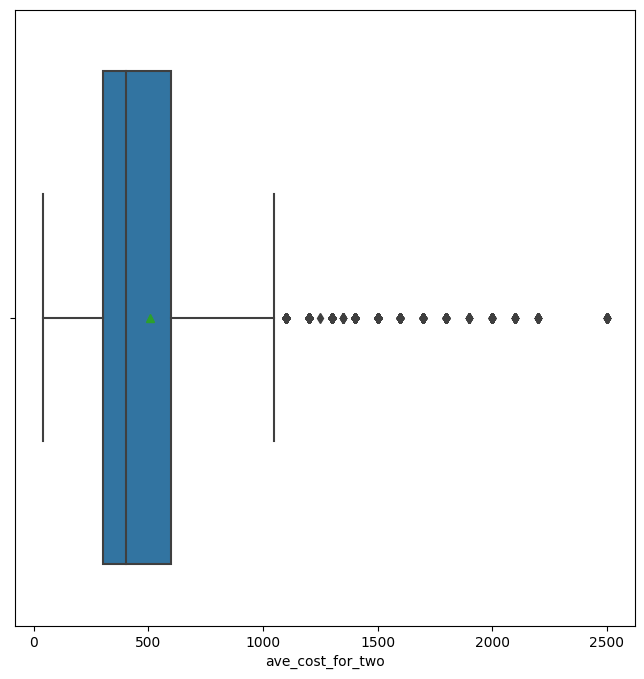

In [ ]:
#Boxplot for average cost for two
plt.figure(figsize=(8, 8))
sns.boxplot(data=Foodiebay, x='ave_cost_for_two', showmeans=True)

<Axes: xlabel='ave_cost_for_two', ylabel='Count'>

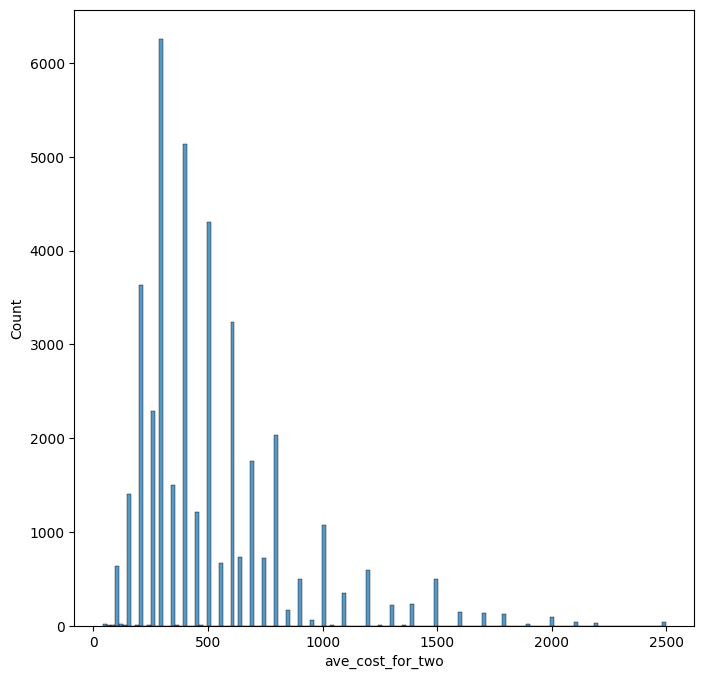

In [ ]:
#Histogram for average cost for two
plt.figure(figsize=(8, 8))
sns.histplot(data=Foodiebay, x='ave_cost_for_two')

In [ ]:
#Descriptive stats for average cost for two
Foodiebay['ave_cost_for_two'].describe()

count    39890.000000
mean       506.697293
std        324.164372
min         40.000000
25%        300.000000
50%        400.000000
75%        600.000000
max       2500.000000
Name: ave_cost_for_two, dtype: float64

In [ ]:
Foodiebay['ave_cost_for_two'].median()


400.0

As the average cost is right skewed, the missing values will be replaced by median (400)

In [ ]:
#Descriptive stats for review ranking
Foodiebay['ave_review_ranking'].describe()

count    33751.000000
mean         3.588297
std          0.913524
min          1.000000
25%          3.000000
50%          3.727273
75%          4.142857
max          5.000000
Name: ave_review_ranking, dtype: float64

<Axes: xlabel='ave_review_ranking'>

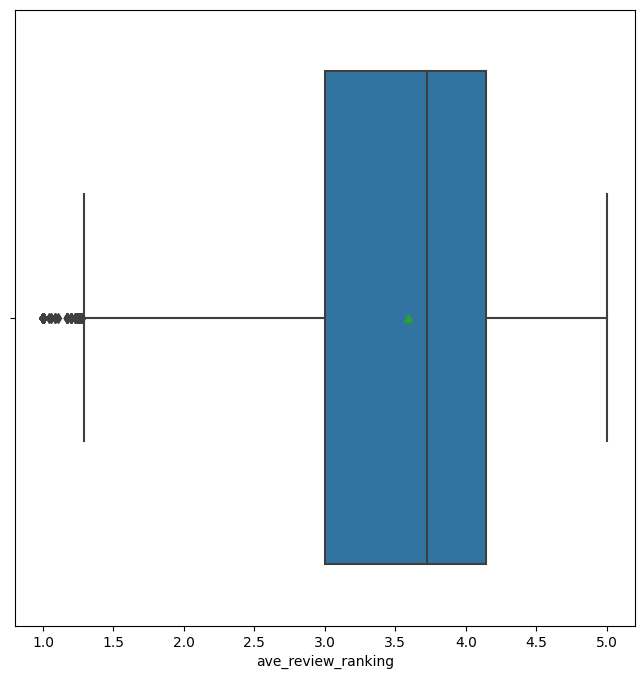

In [ ]:
#Boxplot for average review ranking
plt.figure(figsize=(8, 8))
sns.boxplot(data=Foodiebay, x='ave_review_ranking', showmeans=True)

<Axes: xlabel='ave_review_ranking', ylabel='Count'>

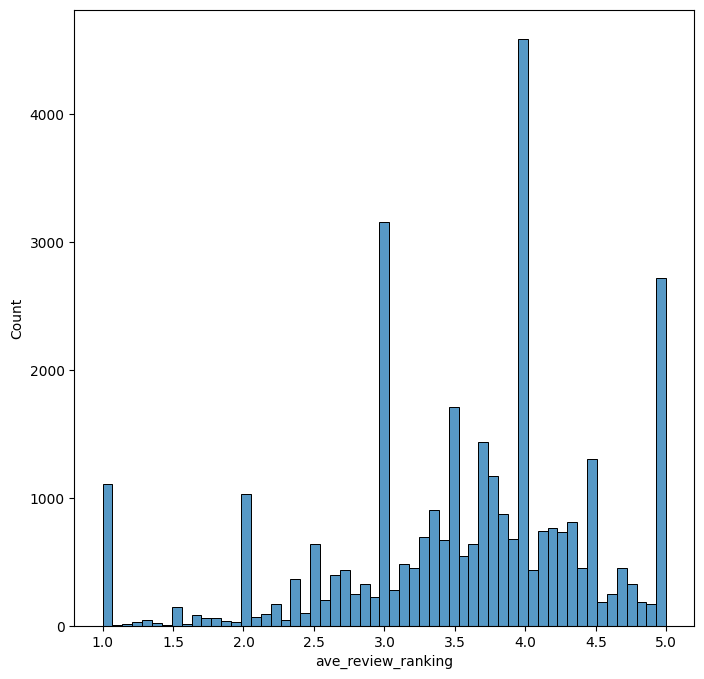

In [ ]:
#Histogram for average review ranking
plt.figure(figsize=(8, 8))
sns.histplot(data=Foodiebay, x='ave_review_ranking')

Average review ranking is left skewed

In [ ]:
Foodiebay['ave_review_ranking'].median()

3.727272727272727

<Axes: xlabel='rate'>

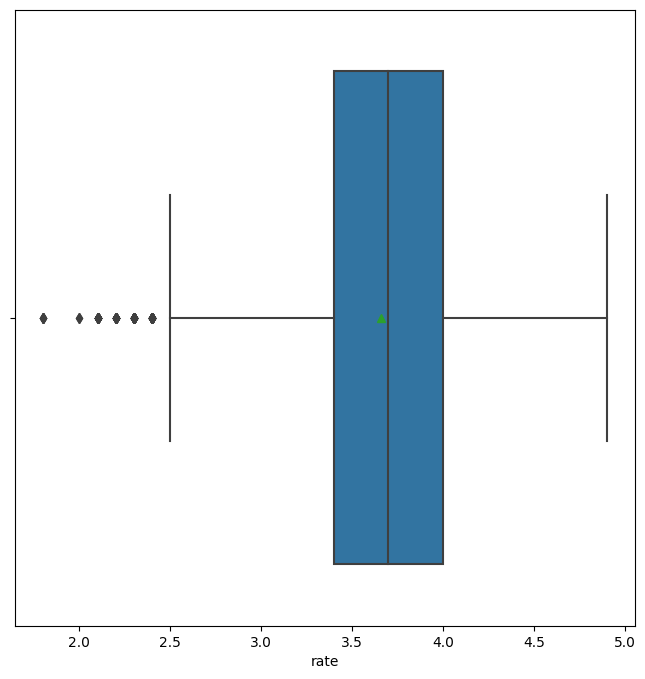

In [ ]:
#Boxplot for average rating
plt.figure(figsize=(8, 8))
sns.boxplot(data=Foodiebay, x='rate', showmeans=True)

<Axes: xlabel='votes', ylabel='Count'>

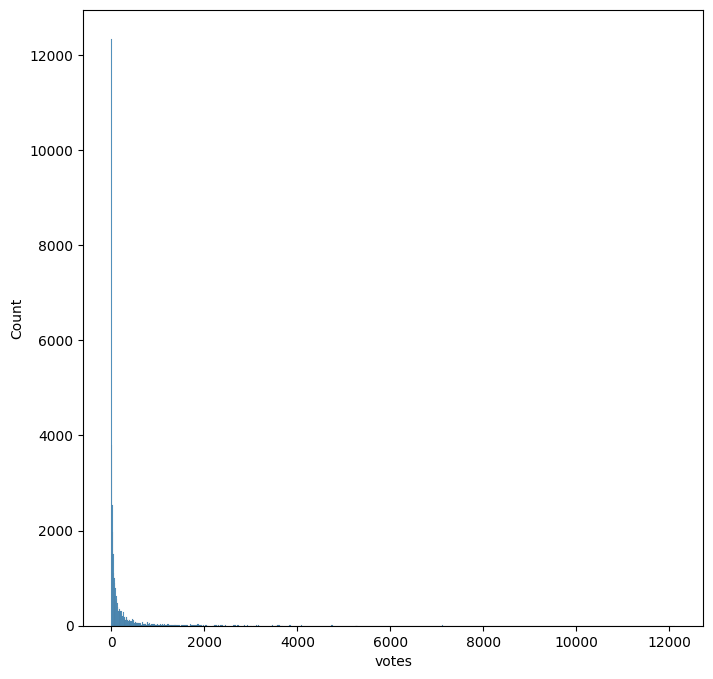

In [ ]:
#Histogram for votes
plt.figure(figsize=(8, 8))
sns.histplot(data=Foodiebay, x='votes')

In [ ]:
#Descriptive stats for votes
Foodiebay['votes'].describe()

count    40130.000000
mean       225.685547
std        598.568781
min          0.000000
25%          6.000000
50%         36.000000
75%        174.000000
max      12121.000000
Name: votes, dtype: float64

In [ ]:
median_votes = Foodiebay['votes'].median()
print("Median number of votes:", median_votes)

Median number of votes: 36.0


<Axes: xlabel='rate', ylabel='Count'>

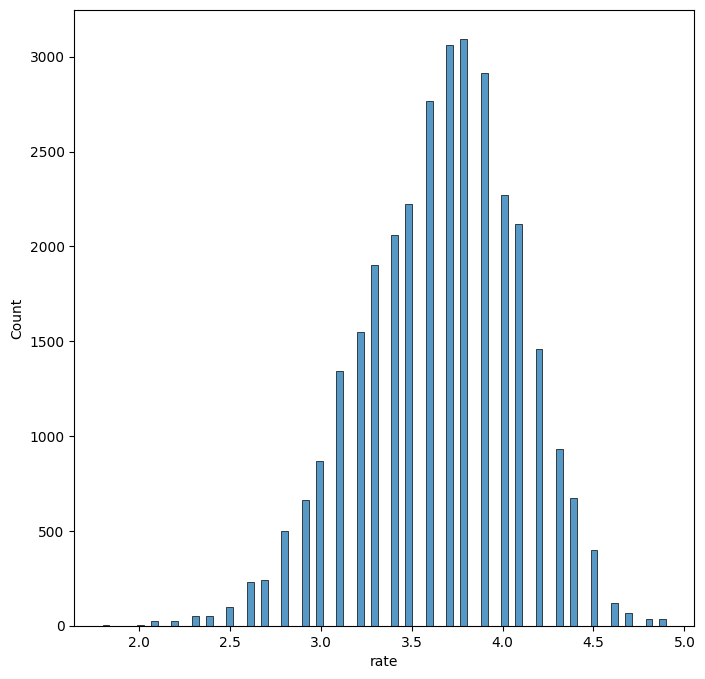

In [ ]:
#Histogram for rating
plt.figure(figsize=(8, 8))
sns.histplot(data=Foodiebay, x='rate')

Rating is Normally distributed

In [ ]:
#Descriptive stats for rating
Foodiebay['rate'].describe()

count    31794.000000
mean         3.657275
std          0.431129
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

#Handling of missing values

In [ ]:
#Replacing average for two missing values with the median
Foodiebay['ave_cost_for_two'].fillna(Foodiebay['ave_cost_for_two'].median(),inplace=True)

In [ ]:
#Replacing average review ranking missing values with the median
Foodiebay['ave_review_ranking'].fillna(Foodiebay['ave_review_ranking'].median(),inplace=True)

In [ ]:
#Removing missing values in the label attribute
Foodiebay.dropna(subset=['rate'], inplace=True)

In [ ]:
#checking for the count of missing values after removing or replacing them
print(Foodiebay.isnull().sum().sort_values(ascending=0))

dish_liked            14551
phone                   634
cuisines                  8
url                       0
online_order              0
ave_review_ranking        0
votes                     0
ave_cost_for_two          0
book_table                0
listed_in_type            0
listed_in_city            0
address                   0
menu_item                 0
rest_type                 0
location                  0
name                      0
rate                      0
dtype: int64


In [ ]:
#Getting information on the data types, number missing values and shape of dataframe
print(Foodiebay.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31794 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 31794 non-null  object 
 1   address             31794 non-null  object 
 2   name                31794 non-null  object 
 3   phone               31160 non-null  object 
 4   location            31794 non-null  object 
 5   rest_type           31794 non-null  object 
 6   cuisines            31786 non-null  object 
 7   menu_item           31794 non-null  object 
 8   listed_in_type      31794 non-null  object 
 9   listed_in_city      31794 non-null  object 
 10  online_order        31794 non-null  object 
 11  book_table          31794 non-null  object 
 12  ave_cost_for_two    31794 non-null  float64
 13  dish_liked          17243 non-null  object 
 14  votes               31794 non-null  int64  
 15  ave_review_ranking  31794 non-null  float64
 16  rate

#EDA

Univariate analysis

<Axes: xlabel='rest_type', ylabel='count'>

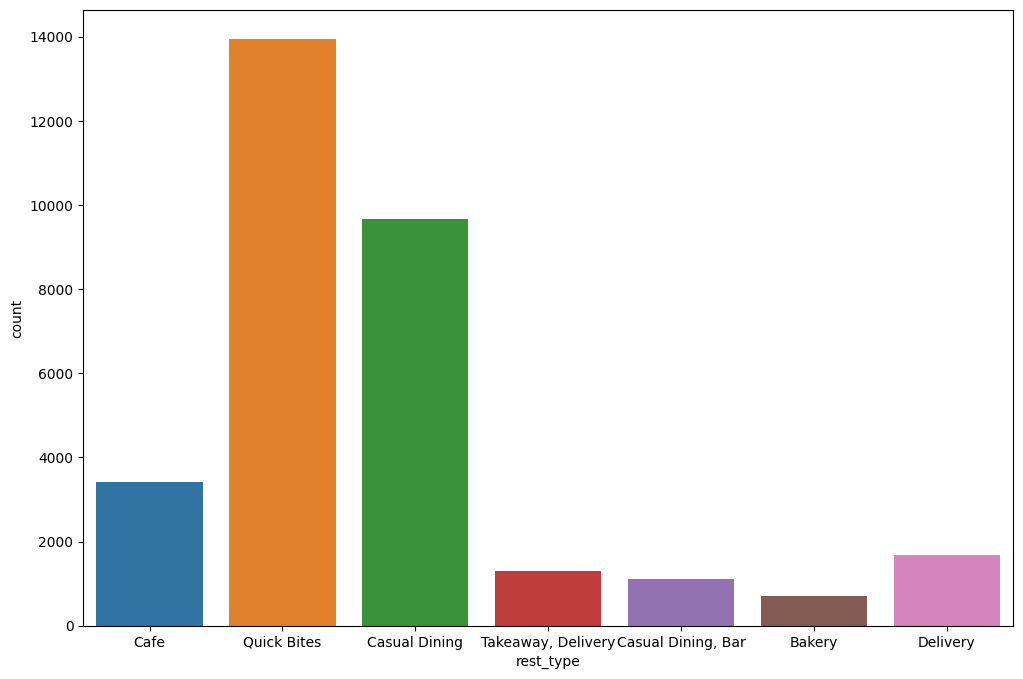

In [ ]:
#Using seaborn to visualise 'rest type'
plt.figure(figsize=(12, 8))
sns.countplot(x=Foodiebay['rest_type'])

<Axes: xlabel='listed_in_type', ylabel='count'>

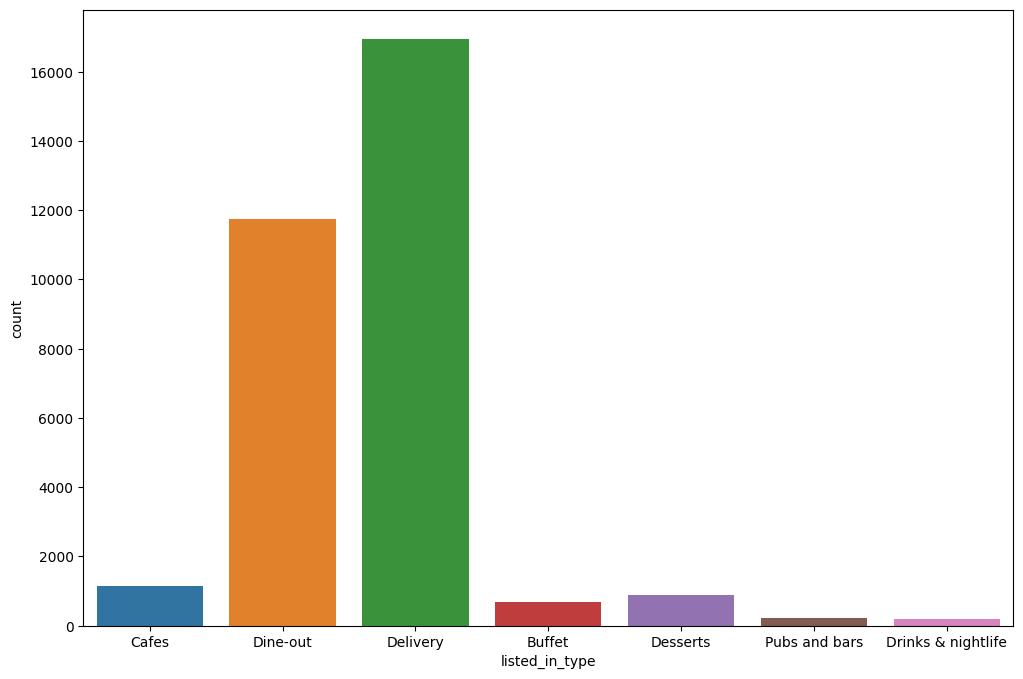

In [ ]:
#Using seaborn to visualise 'listed in type'
plt.figure(figsize=(12, 8))
sns.countplot(x=Foodiebay['listed_in_type'])

<Axes: xlabel='listed_in_city', ylabel='count'>

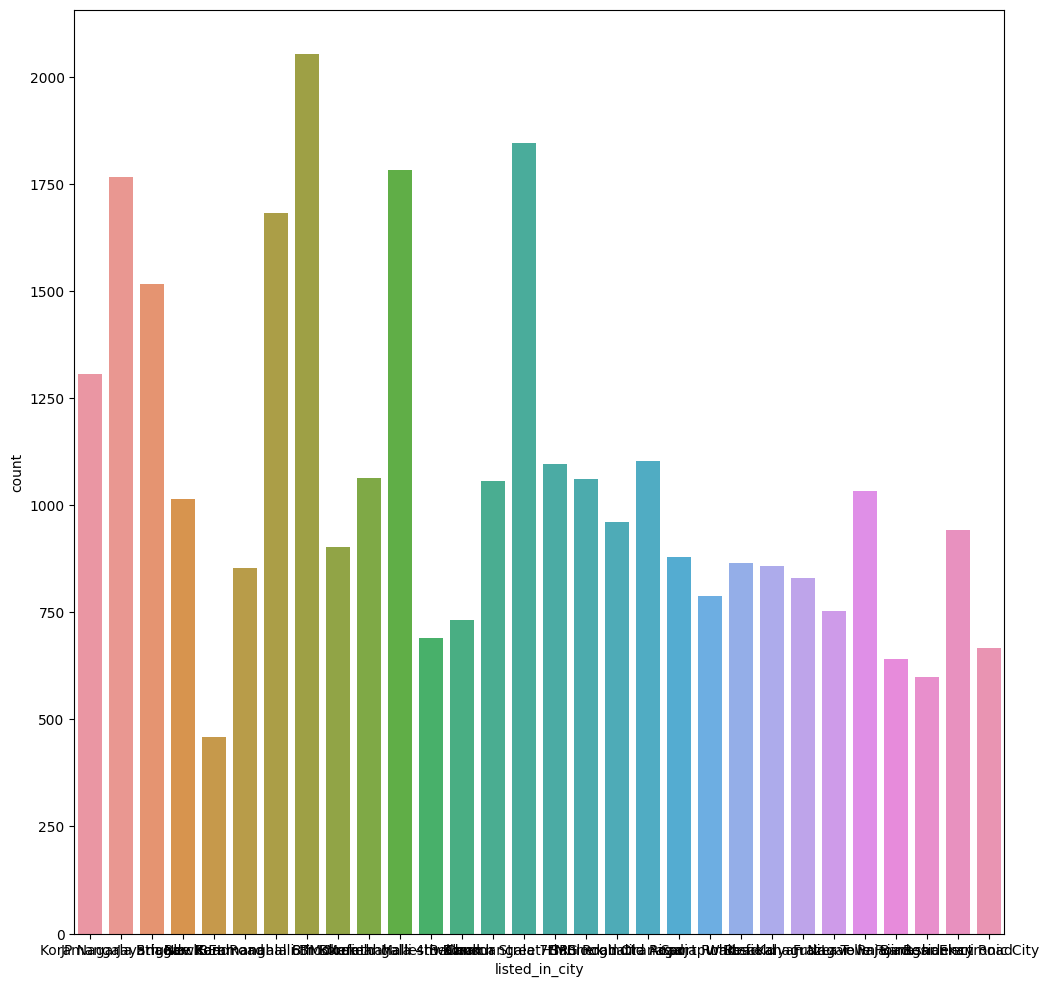

In [ ]:
#Using seaborn to visualise listed in city
plt.figure(figsize=(12, 12))
sns.countplot(x=Foodiebay['listed_in_city'])

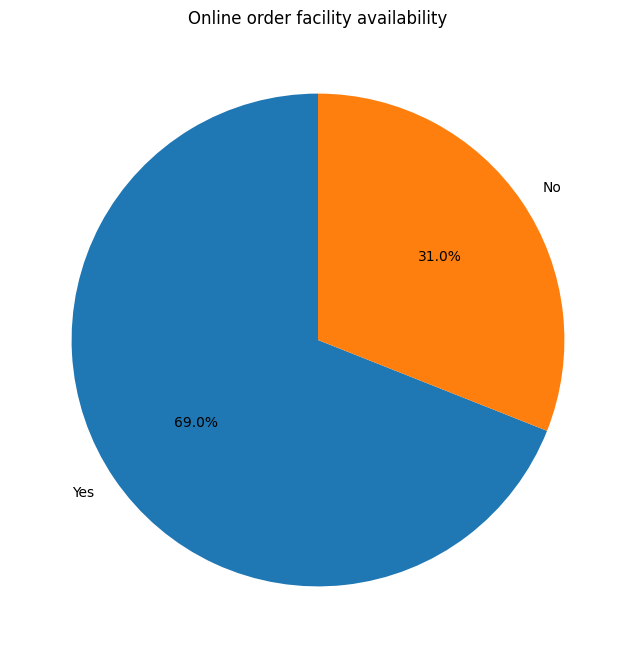

In [ ]:
online_order_counts = Foodiebay['online_order'].value_counts()
# Labels for the pie chart
labels = online_order_counts.index
# Data to be visualized
data = online_order_counts.values
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Online order facility availability")
plt.show()

In [ ]:
# Get the value counts for 'online order' column
book_table_counts = Foodiebay['online_order'].value_counts()

# Print the counts
print("Count of restaurants offering online ordering:")
print(book_table_counts['Yes'])

print("Count of restaurants not offering online ordering:")
print(book_table_counts['No'])

Count of restaurants offering online ordering:
21935
Count of restaurants not offering online ordering:
9859


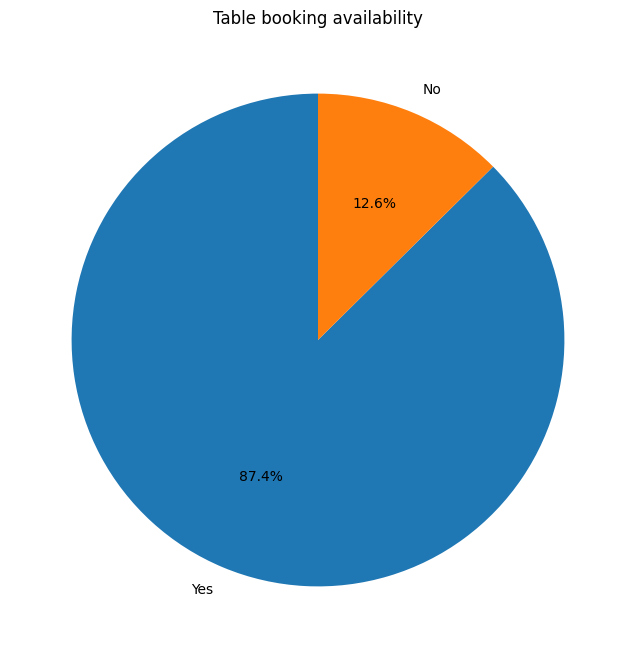

In [ ]:
book_table_counts = Foodiebay['book_table'].value_counts()
# Labels for the pie chart
labels = online_order_counts.index
# Data to be visualized
data = book_table_counts.values
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Table booking availability")
plt.show()

In [ ]:
# Get the value counts for 'book_table' column
book_table_counts = Foodiebay['book_table'].value_counts()

# Print the counts
print("Count of restaurants offering table booking:")
print(book_table_counts['Yes'])

print("Count of restaurants not offering table booking:")
print(book_table_counts['No'])

Count of restaurants offering table booking:
4000
Count of restaurants not offering table booking:
27794






**Bi Variete analysis and answers for the 5 questions**

In [ ]:
# Calculate average ratings for each restaurant type
average_ratings_rest_type = Foodiebay.groupby('rest_type')['rate'].mean()
print(average_ratings_rest_type)

rest_type
Bakery                3.607955
Cafe                  3.847342
Casual Dining         3.740398
Casual Dining, Bar    4.079009
Delivery              3.569286
Quick Bites           3.546113
Takeaway, Delivery    3.513622
Name: rate, dtype: float64


The ratings across all resturant types is equal


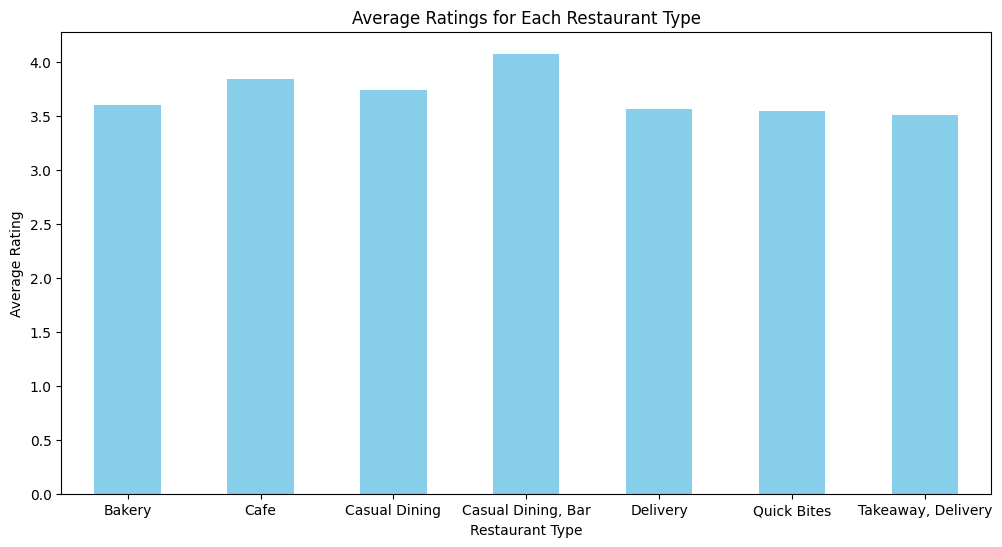

In [ ]:
#Visualising avreage ratings by resturant type
plt.figure(figsize=(12, 6))
average_ratings_rest_type.plot(kind='bar', color='skyblue')
plt.title('Average Ratings for Each Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Calculate average cost for each resturant type
average_cost_res_type = Foodiebay.groupby('rest_type')['ave_cost_for_two'].mean()
print(average_cost_res_type )

rest_type
Bakery                 366.832386
Cafe                   629.162996
Casual Dining          797.028678
Casual Dining, Bar    1247.117117
Delivery               453.184524
Quick Bites            329.350258
Takeaway, Delivery     410.275542
Name: ave_cost_for_two, dtype: float64


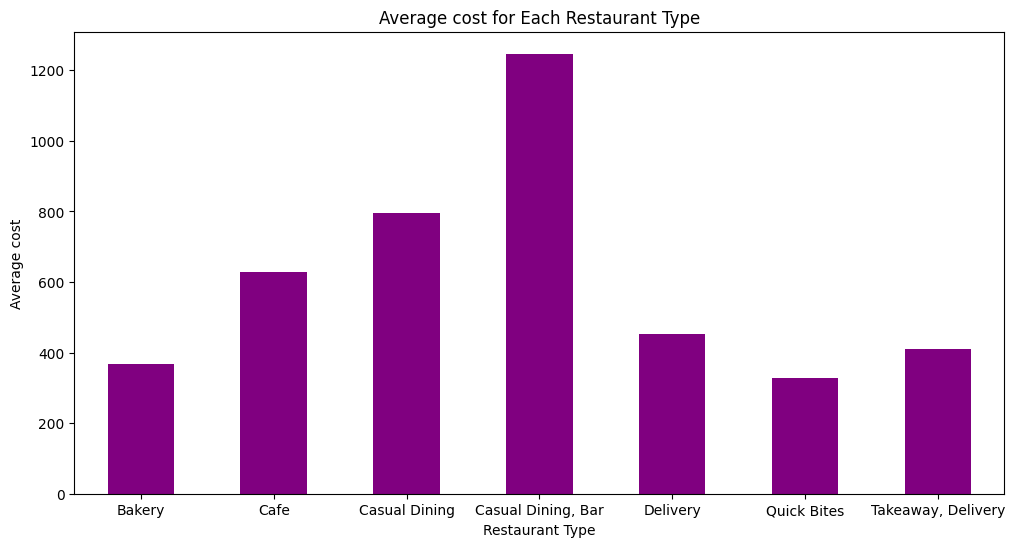

In [ ]:
#Visualising avreage cost by resturant type
plt.figure(figsize=(12, 6))
average_cost_res_type.plot(kind='bar', color='purple')
plt.title('Average cost for Each Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average cost')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
# Calculate average ratings for each listed in type
average_ratings_listed_type = Foodiebay.groupby('listed_in_type')['rate'].mean()
print(average_ratings_listed_type )

listed_in_type
Buffet                3.941543
Cafes                 3.825747
Delivery              3.628929
Desserts              3.728732
Dine-out              3.646874
Drinks & nightlife    4.054237
Pubs and bars         4.056075
Name: rate, dtype: float64


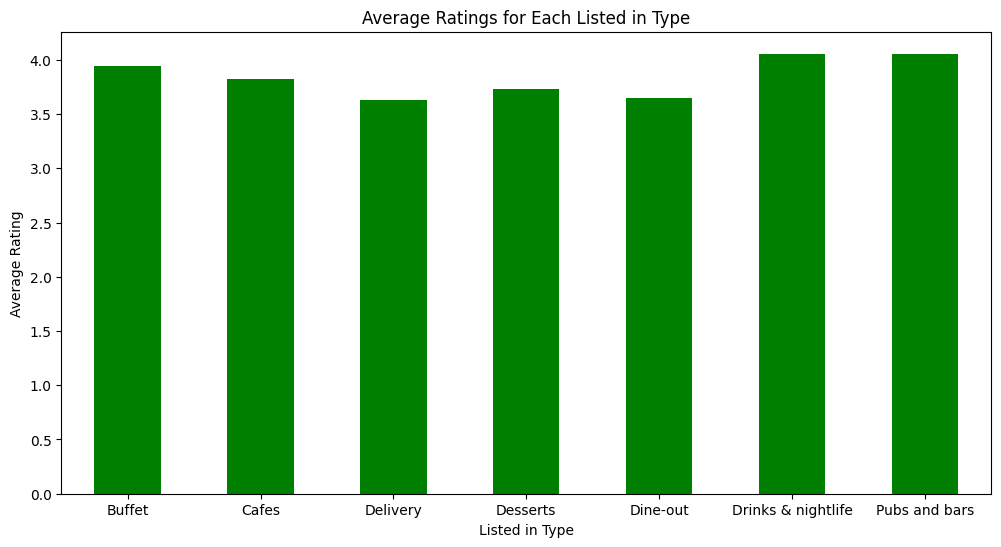

In [ ]:
#Visualising avreage ratings by listed in type
plt.figure(figsize=(12, 6))
average_ratings_listed_type.plot(kind='bar', color='green')
plt.title('Average Ratings for Each Listed in Type')
plt.xlabel('Listed in Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Average ratings for each listed in type is not diffent



In [ ]:
# Calculate average ratings for online order type
average_ratings_online_order = Foodiebay.groupby('online_order')['rate'].mean()
print(average_ratings_online_order )

online_order
No     3.579349
Yes    3.692300
Name: rate, dtype: float64


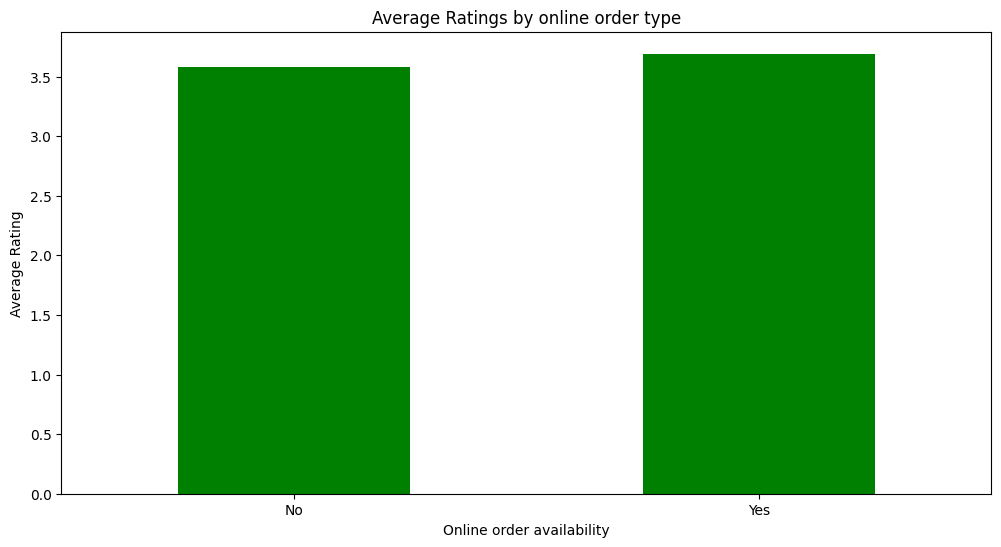

In [ ]:
#Visualising avreage ratings for online order
plt.figure(figsize=(12, 6))
average_ratings_online_order.plot(kind='bar', color='green')
plt.title('Average Ratings by online order type')
plt.xlabel('Online order availability')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

Average ratings for each order type


In [ ]:
# Calculate average ratings for book table
average_ratings_book_table = Foodiebay.groupby('book_table')['rate'].mean()
print(average_ratings_book_table )

book_table
No     3.591944
Yes    4.111225
Name: rate, dtype: float64


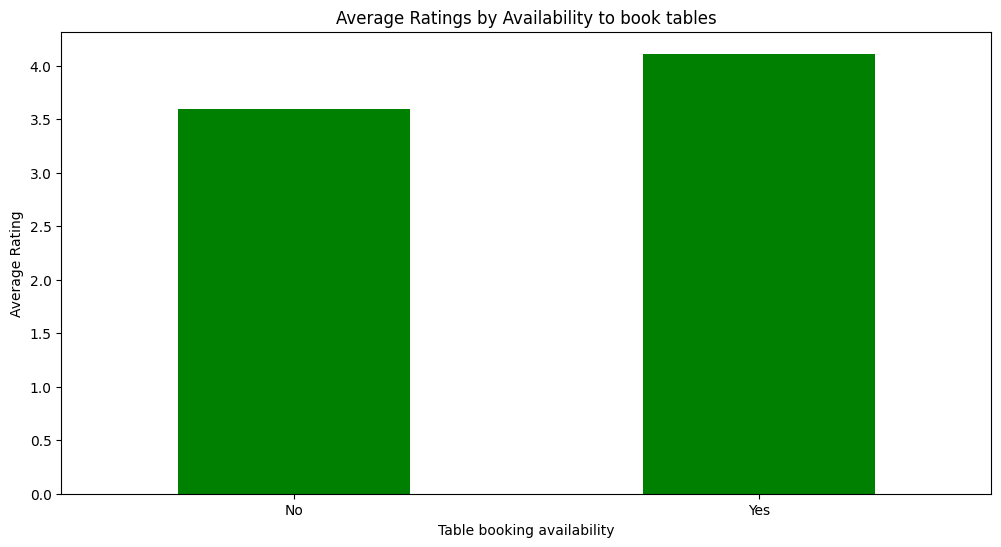

In [ ]:
#Visualising avreage ratings for book table
plt.figure(figsize=(12, 6))
average_ratings_book_table.plot(kind='bar', color='green')
plt.title('Average Ratings by Availability to book tables')
plt.xlabel('Table booking availability')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

<Axes: xlabel='rate', ylabel='votes'>

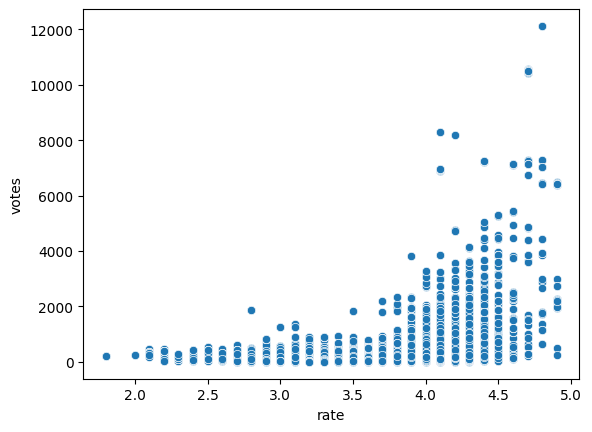

In [ ]:
sns.scatterplot(data=Foodiebay, x ='rate', y='votes')

<Axes: xlabel='ave_review_ranking', ylabel='ave_cost_for_two'>

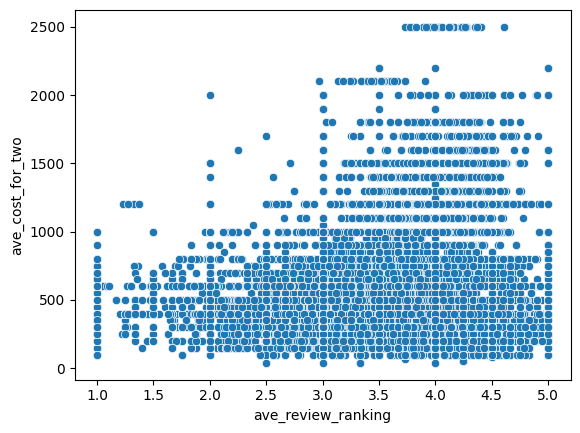

In [ ]:
#Relationship between average cost and review ranking
sns.scatterplot(data=Foodiebay, x ='ave_review_ranking', y='ave_cost_for_two')

<Axes: xlabel='rate', ylabel='ave_cost_for_two'>

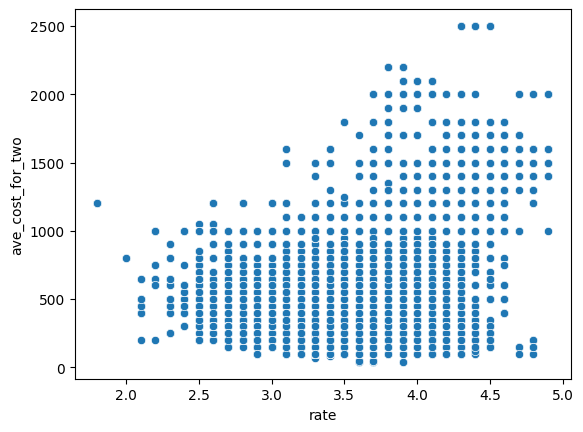

In [ ]:
#Relationship between average cost and rate
sns.scatterplot(data=Foodiebay, x ='rate', y='ave_cost_for_two')

<Axes: xlabel='ave_review_ranking', ylabel='rate'>

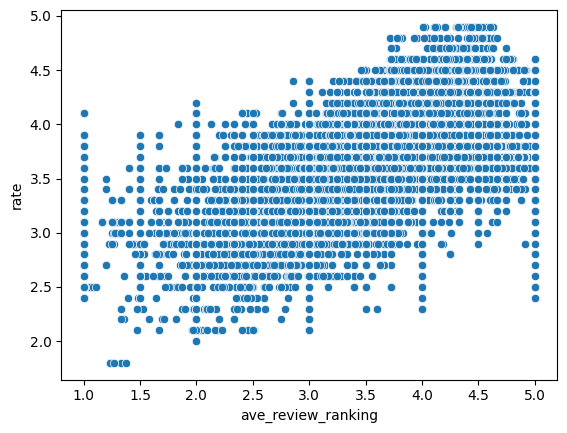

In [ ]:
#Relationship between average rate and review ranking
sns.scatterplot(data=Foodiebay, x ='ave_review_ranking', y='rate')

Additional insights

In [ ]:
# Calculate average cost by location
average_cost_city = Foodiebay.groupby('listed_in_city')['ave_cost_for_two'].mean().sort_values(ascending=False)
pd.set_option('display.max_rows', None)
print (average_cost_city)

listed_in_city
Brigade Road             702.998028
Church Street            693.551136
MG Road                  684.858491
Lavelle Road             683.526163
Residency Road           673.937367
Indiranagar              592.862319
Frazer Town              581.436170
Whitefield               561.720554
Bellandur                557.934337
Old Airport Road         550.330296
Brookefield              546.895787
Malleshwaram             540.667634
Sarjapur Road            538.437103
Koramangala 4th Block    532.636007
Koramangala 6th Block    529.584076
Koramangala 5th Block    525.617214
Koramangala 7th Block    521.680217
Kalyan Nagar             520.747889
Marathahalli             510.065851
Electronic City          509.384384
BTM                      507.872444
Kammanahalli             502.693208
HSR                      502.007299
Rajajinagar              500.781250
Jayanagar                492.678100
Bannerghatta Road        483.870968
JP Nagar                 483.511859
New BEL Road 

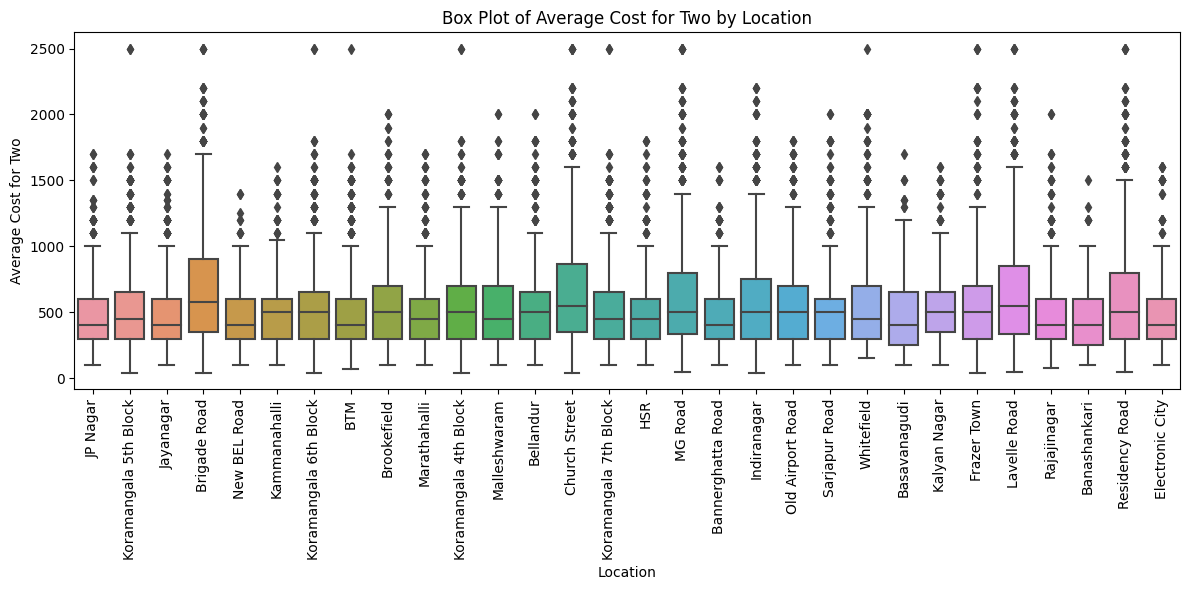

In [ ]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in_city', y='ave_cost_for_two', data=Foodiebay)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location')
plt.ylabel('Average Cost for Two')
plt.title('Box Plot of Average Cost for Two by Location')
plt.tight_layout()
plt.show()

In [ ]:
#Getting resturant counts for each location
restaurant_count_by_location = Foodiebay.groupby('location').size().sort_values(ascending=False)
print(restaurant_count_by_location)

location
BTM                              3358
HSR                              1659
Koramangala 5th Block            1580
JP Nagar                         1324
Indiranagar                      1309
Jayanagar                        1292
Marathahalli                     1162
Whitefield                       1136
Bannerghatta Road                 918
Koramangala 6th Block             792
Koramangala 1st Block             782
Koramangala 7th Block             780
Bellandur                         750
Brigade Road                      683
Ulsoor                            680
Electronic City                   678
Sarjapur Road                     662
Banashankari                      595
Koramangala 4th Block             588
Kalyan Nagar                      526
Basavanagudi                      485
Frazer Town                       484
Richmond Road                     459
Brookefield                       436
Kammanahalli                      430
MG Road                           428
New

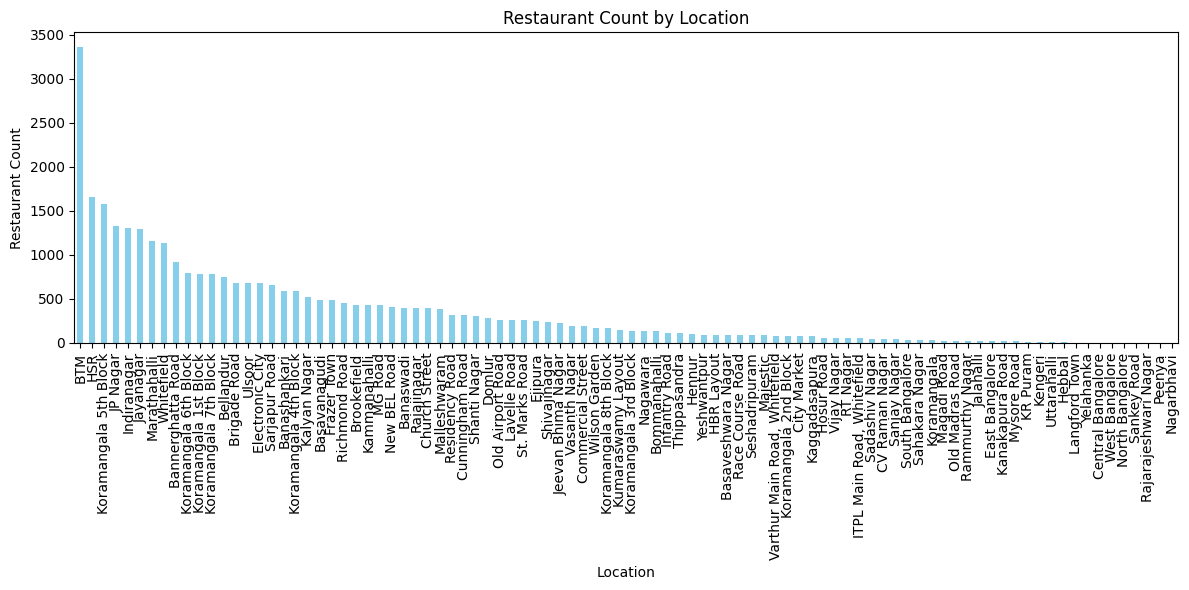

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
restaurant_count_by_location.plot(kind='bar', color='skyblue')
plt.xlabel('Location')
plt.ylabel('Restaurant Count')
plt.title('Restaurant Count by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
#Getting resturant counts for each city
restaurant_count_by_city = Foodiebay.groupby('listed_in_city').size().sort_values(ascending=False)
print(restaurant_count_by_city)

listed_in_city
BTM                      2054
Koramangala 7th Block    1845
Koramangala 4th Block    1783
Koramangala 5th Block    1766
Koramangala 6th Block    1683
Jayanagar                1516
JP Nagar                 1307
Indiranagar              1104
HSR                      1096
Marathahalli             1063
MG Road                  1060
Church Street            1056
Lavelle Road             1032
Brigade Road             1014
Bannerghatta Road         961
Residency Road            942
Brookefield               902
Old Airport Road          878
Whitefield                866
Basavanagudi              859
Kammanahalli              854
Kalyan Nagar              829
Sarjapur Road             787
Frazer Town               752
Bellandur                 731
Malleshwaram              689
Electronic City           666
Rajajinagar               640
Banashankari              600
New BEL Road              459
dtype: int64


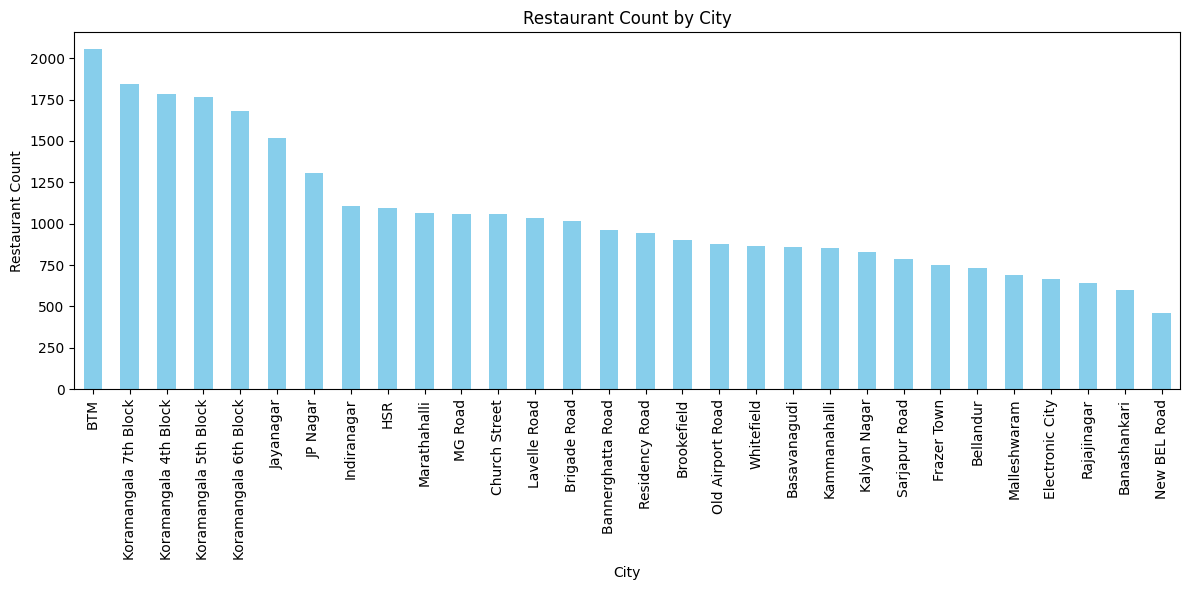

In [ ]:
# Create a bar plot
plt.figure(figsize=(12, 6))
restaurant_count_by_city.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Restaurant Count')
plt.title('Restaurant Count by City')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Average rating for each city
rate_by_city = Foodiebay.groupby('location')['rate'].mean().sort_values(ascending=False)
rate_by_city_formatted = rate_by_city.round(2).apply('{:.2f}'.format)  # Round to two decimal points and format as desired

pd.set_option('display.max_rows', None)
print(rate_by_city_formatted)

location
Lavelle Road                     4.08
Sankey Road                      4.00
Koramangala 3rd Block            3.98
St. Marks Road                   3.96
Koramangala 5th Block            3.96
Church Street                    3.94
Koramangala 4th Block            3.88
Rajarajeshwari Nagar             3.85
Infantry Road                    3.83
Sadashiv Nagar                   3.81
Malleshwaram                     3.81
Koramangala 7th Block            3.80
Richmond Road                    3.79
Koramangala 2nd Block            3.78
Cunningham Road                  3.78
Koramangala 6th Block            3.77
Jayanagar                        3.77
Hosur Road                       3.77
Koramangala 8th Block            3.76
Indiranagar                      3.76
Seshadripuram                    3.74
Residency Road                   3.74
Kalyan Nagar                     3.73
Ulsoor                           3.73
Koramangala                      3.73
Kengeri                          3.72
MG 

In [ ]:
# Average rating for each cuisine
rate_by_cuisine = Foodiebay.groupby('cuisines')['rate'].mean().sort_values(ascending=False)
rate_by_cuisine = rate_by_cuisine.round(2).apply('{:.2f}'.format)  # Round to two decimal points and format as desired

pd.set_option('display.max_rows', None)
print(rate_by_cuisine)

cuisines
Asian, Chinese, Thai, Momos                                                             4.90
Healthy Food, Salad, Mediterranean                                                      4.90
Asian, Mediterranean, North Indian, BBQ                                                 4.80
North Indian, European, Mediterranean, BBQ                                              4.80
European, Mediterranean, North Indian, BBQ                                              4.79
American, Tex-Mex, Burger, BBQ, Mexican                                                 4.75
Sushi, Japanese, Chinese, Thai                                                          4.70
Asian, Burmese                                                                          4.70
BBQ, North Indian, Continental, Chinese                                                 4.70
North Indian, European, Mediterranean                                                   4.70
European, Asian                                              

In [ ]:
#removing url, address,name and phone from the dataframe
columns_to_delete = ['url', 'address', 'name','phone']
Foodiebay.drop(columns_to_delete, axis=1, inplace=True)

In [ ]:
Foodiebay.head()

location      rest_type  \
0      Bannerghatta Road           Cafe   
1  Koramangala 1st Block    Quick Bites   
2           Basavanagudi    Quick Bites   
3           Shanti Nagar  Casual Dining   
4           New BEL Road           Cafe   

                                cuisines  \
0                                   Cafe   
1         Burger, Continental, Fast Food   
2             South Indian, Healthy Food   
3  Chinese, North Indian, Biryani, Kebab   
4                              Cafe, Tea   

                                           menu_item listed_in_type  \
0                                                 []          Cafes   
1                                                 []       Dine-out   
2                                                 []       Delivery   
3  ['Hyderabadi Biryani', 'Special Veg Combo', 'S...       Delivery   
4                                                 []       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

**Converting Categorical Variables to Numerical Variables through dummy coding**

In [ ]:
#EDA for Online boking
Foodiebay['online_order'].value_counts()

Yes    21935
No      9859
Name: online_order, dtype: int64

<Axes: xlabel='online_order', ylabel='count'>

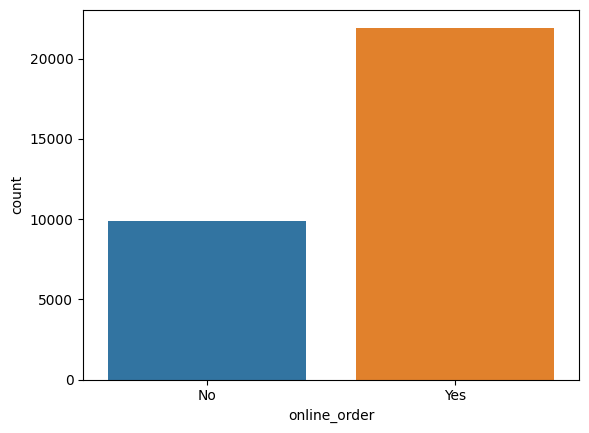

In [ ]:
sns.countplot(x=Foodiebay['online_order'])

In [ ]:
#Converting Online order to Numeric through dummy coding
Foodiebay.online_order = Foodiebay.online_order.replace({'No':0, 'Yes':1})

In [ ]:
#EDA for Online boking
Foodiebay['online_order'].value_counts()

1    21935
0     9859
Name: online_order, dtype: int64

In [ ]:
#EDA for Book table
Foodiebay['book_table'].value_counts()

No     27794
Yes     4000
Name: book_table, dtype: int64

<Axes: xlabel='book_table', ylabel='count'>

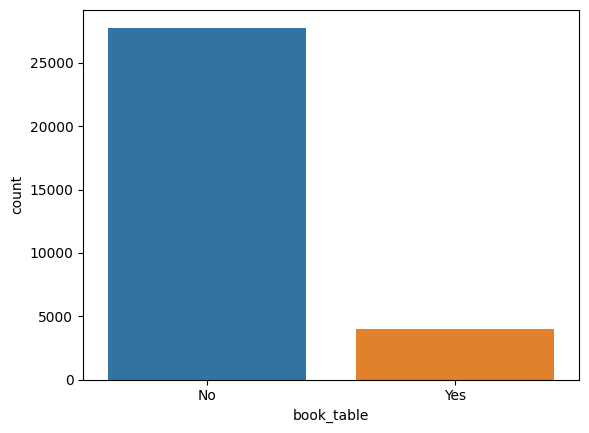

In [ ]:
sns.countplot(x=Foodiebay['book_table'])

In [ ]:
#Converting Book table to Numeric through dummy coding
Foodiebay.book_table = Foodiebay.book_table.replace({'No':0, 'Yes':1})

In [ ]:
#EDA for Book table
Foodiebay['book_table'].value_counts()

0    27794
1     4000
Name: book_table, dtype: int64

In [ ]:
Foodiebay.head()

location      rest_type  \
0      Bannerghatta Road           Cafe   
1  Koramangala 1st Block    Quick Bites   
2           Basavanagudi    Quick Bites   
3           Shanti Nagar  Casual Dining   
4           New BEL Road           Cafe   

                                cuisines  \
0                                   Cafe   
1         Burger, Continental, Fast Food   
2             South Indian, Healthy Food   
3  Chinese, North Indian, Biryani, Kebab   
4                              Cafe, Tea   

                                           menu_item listed_in_type  \
0                                                 []          Cafes   
1                                                 []       Dine-out   
2                                                 []       Delivery   
3  ['Hyderabadi Biryani', 'Special Veg Combo', 'S...       Delivery   
4                                                 []       Dine-out   

          listed_in_city  online_order  book_table  ave_cost_for_two  \
0               JP Nagar             0           0             700.0   
1  Koramangala 5th Block             1           0             400.0   
2              Jayanagar             1           0             200.0   
3           Brigade Road             1           1            1200.0   
4           New BEL Road             1           0             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

<Axes: xlabel='rate', ylabel='book_table'>

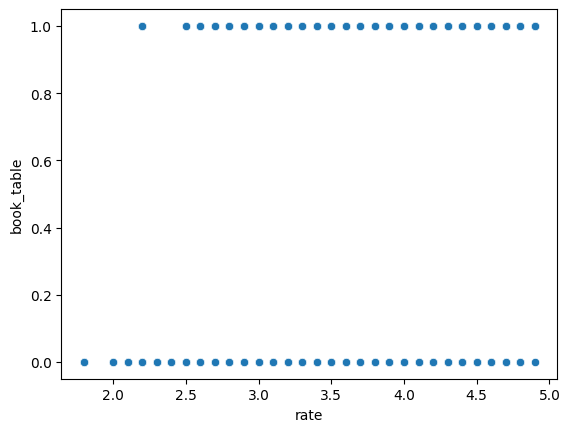

In [ ]:
#Relationship between book table and rate
sns.scatterplot(data=Foodiebay, x ='rate', y='book_table')

<Axes: xlabel='rate', ylabel='online_order'>

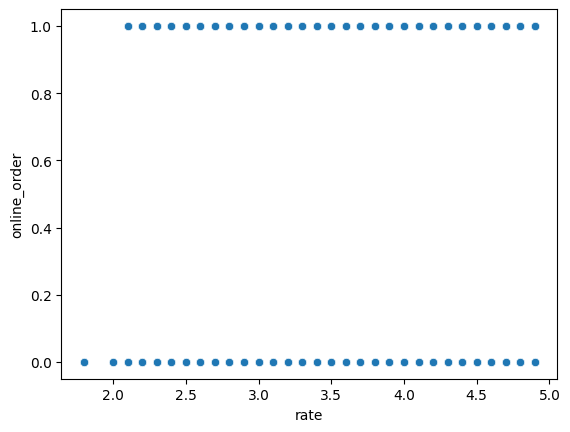

In [ ]:
#Relationship between online order and rate
sns.scatterplot(data=Foodiebay, x ='rate', y='online_order')

In [ ]:
Foodiebay.rest_type.unique()

array(['Cafe', 'Quick Bites', 'Casual Dining', 'Takeaway, Delivery',
       'Casual Dining, Bar', 'Bakery', 'Delivery'], dtype=object)

In [ ]:
Foodiebay.listed_in_type.unique()

array(['Cafes', 'Dine-out', 'Delivery', 'Buffet', 'Desserts',
       'Pubs and bars', 'Drinks & nightlife'], dtype=object)

In [ ]:
#Converting Road Types Converting resturto Numeric through dummy coding
Foodiebay.rest_type = Foodiebay.rest_type.replace({'Cafe':0, 'Quick Bites':1, 'Casual Dining': 2,'Takeaway, Delivery':3,'Casual Dining, Bar':4,'Bakery':5,'Delivery':6})

In [ ]:
#Converting Road Types to Numeric through dummy coding
Foodiebay.listed_in_type = Foodiebay.listed_in_type.replace({'Cafes':0, 'Dine-out':1, 'Delivery': 2,'Buffet':3,'Desserts':4,'Pubs and bars':5,'Drinks & nightlife':6})

<ipython-input-137-bc82dfed2f51>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Foodiebay.corr(), square=True, cmap='Reds', annot=True)


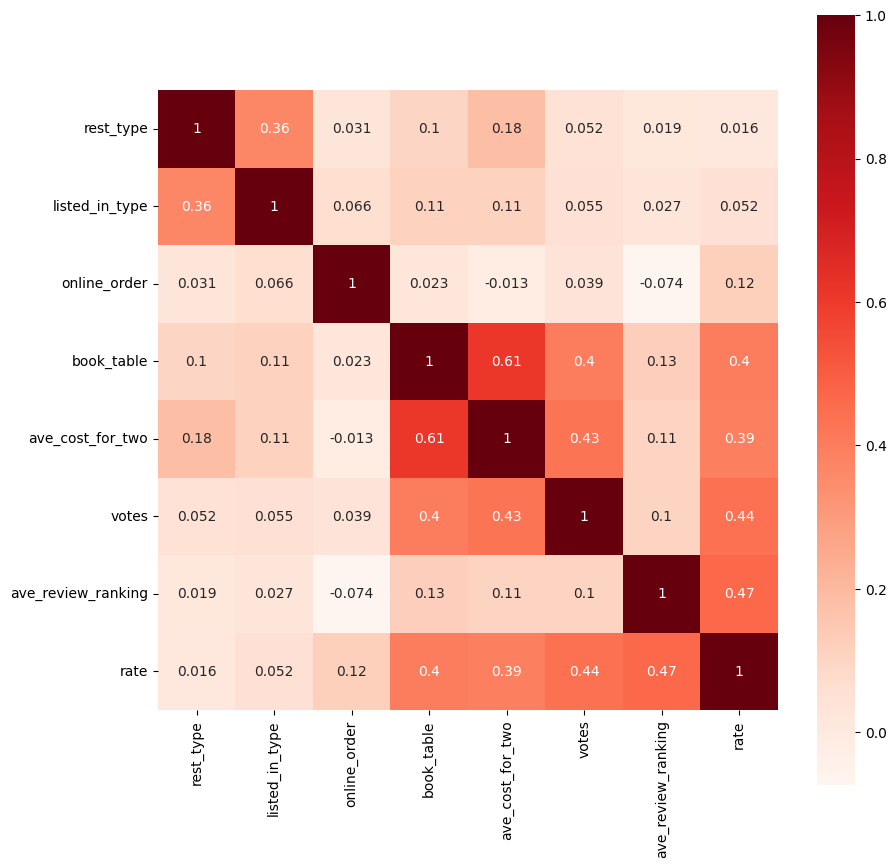

In [ ]:
#Using a heatmap to conduct a multi variate analysis
plt.figure(figsize=(10,10))
sns.heatmap(Foodiebay.corr(), square=True, cmap='Reds', annot=True)
plt.show()

#Data split and scaling feature data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Define the predictors
features=['ave_cost_for_two','votes','ave_review_ranking','book_table']
X=Foodiebay[features]
#Define the label
y=Foodiebay['rate']
print(X.head())
print(y.head())

   ave_cost_for_two  votes  ave_review_ranking  book_table
0             700.0     13                4.75           0
1             400.0     28                4.50           0
2             200.0     18                4.00           0
3            1200.0    550                4.80           1
4             250.0     67                3.00           0
0    3.6
1    3.8
2    3.9
3    4.3
4    3.7
Name: rate, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1996)

In [ ]:
# Features to scale
features_to_scale = ['ave_cost_for_two','votes','ave_review_ranking']

# Features to keep
features_to_keep = ['book_table']

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler(clip=True)

In [ ]:
# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])
# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_train_scaled = pd.concat([X_train_scaled, X_train[features_to_keep].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[features_to_keep].reset_index(drop=True)], axis=1)

#Model 1 : Linear Regression Model

In [ ]:
#import linear_model
from sklearn import linear_model

#create a linear_model object
reg = linear_model.LinearRegression()

Training Model

In [ ]:
# Train a Regression model (regressor) with the training dataset
reg=reg.fit(X_train_scaled, y_train)

Make predictions using the model and the test set

In [ ]:
#Make predictions for the test dataset
y_pred = reg.predict(X_test_scaled)

Inspect the predictions and the original labels

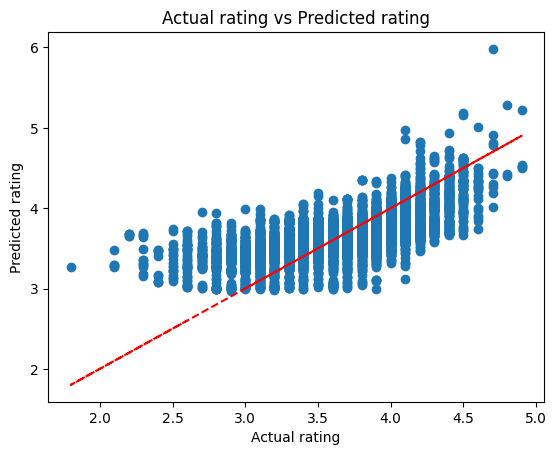

In [ ]:
# Create a scatter plot
plt.scatter(y_test, y_pred)

# Add a red line for Actual rating equals Predicted rating
plt.plot(y_test, y_test, color='red', linestyle='--')

plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.title("Actual rating vs Predicted rating")
plt.show()

In [ ]:
#Make predictions for the test dataset
y_pred = reg.predict(X_test_scaled)

In [ ]:
y_pred

array([3.22159777, 3.57210785, 3.61203752, ..., 3.43782532, 3.41538323,
       3.71887971])

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
book_table = X_test['book_table']
ave_cost_for_two = X_test['ave_cost_for_two']
votes = X_test['votes']
Ave_review_ranking = X_test['ave_review_ranking']
#inspection
inspectionReg=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
inspectionReg=pd.DataFrame({'book_table':book_table,'ave_cost_for_two':ave_cost_for_two,'votes':votes,'ave_review_ranking':Ave_review_ranking,'Actual':y_test, 'Predicted':y_pred}).reset_index(drop=True)
inspectionReg.head(20)

book_table  ave_cost_for_two  votes  ave_review_ranking  Actual  Predicted
0            0            300.00     54                2.00    3.00       3.22
1            0            600.00      8                3.50    3.20       3.57
2            0            300.00     14                3.93    3.60       3.61
3            0            400.00    118                1.50    3.70       3.15
4            1           1500.00   4748                3.74    4.20       4.82
5            0            400.00      4                2.75    3.20       3.38
6            0            500.00    287                4.00    4.00       3.71
7            0            300.00     33                5.00    3.80       3.84
8            0            400.00      4                4.50    3.30       3.74
9            0            600.00     96                3.00    3.80       3.48
10           1            800.00    737                4.17    4.10       4.08
11           0            500.00     21                4.27    3.50       3.72
12           0            650.00    540                2.00    3.80       3.37
13           0            400.00     20                3.40    3.00       3.52
14           0            500.00     28                4.20    3.90       3.70
15           0            600.00     59                4.00    3.90       3.68
16           0            600.00    310                3.80    3.70       3.69
17           0            750.00   1118                4.04    4.10       3.91
18           0            300.00     24                3.00    3.60       3.42
19           1           1500.00   1017                3.19    4.30       4.04

#Performance evaluation - Regression

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.41


In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Calculate and print the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 0.26


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate and print the root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.2f}")

Root Mean Square Error: 0.33


In [ ]:
#Examine the performance using the descriptive stats of Rate
inspectionReg['Actual'].describe()

count   6359.00
mean       3.65
std        0.43
min        1.80
25%        3.40
50%        3.70
75%        4.00
max        4.90
Name: Actual, dtype: float64

In [ ]:
#Examine the performance using the descriptive stats of predicted price
inspectionReg['Predicted'].describe()

count   6359.00
mean       3.65
std        0.27
min        2.97
25%        3.49
50%        3.63
75%        3.78
max        5.98
Name: Predicted, dtype: float64

#Model 2 : Decision Tree

the second model suggested is a decision tree classifer. The model will classify the rate between 1,2,3,4 and 5. Therefore, a new column will be created as Rating class to show the rate.

#Base decision Tree

In [ ]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(random_state=1)



In [ ]:
#code to train the base decision tree
regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
#predict prices for base Decision Tree
y_pred_DT = regressor.predict(X_test_scaled)


In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Book_table = X_test['book_table']
average_cost_for_two = X_test['ave_cost_for_two']
Votes = X_test['votes']
Average_review_ranking = X_test['ave_review_ranking']
#inspection
inspectionDTB=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_DT})
inspectionDTB=pd.DataFrame({'book_table':Book_table,'ave_cost_for_two':average_cost_for_two,'votes':Votes,'ave_review_ranking':Average_review_ranking,'Actual':y_test, 'Predicted':y_pred_DT})
inspectionDTB.head(20)

book_table  ave_cost_for_two  votes  ave_review_ranking  Actual  \
30093           0            300.00     54                2.00    3.00   
25162           0            600.00      8                3.50    3.20   
13773           0            300.00     14                3.93    3.60   
33099           0            400.00    118                1.50    3.70   
22924           1           1500.00   4748                3.74    4.20   
38025           0            400.00      4                2.75    3.20   
29173           0            500.00    287                4.00    4.00   
35606           0            300.00     33                5.00    3.80   
14551           0            400.00      4                4.50    3.30   
4752            0            600.00     96                3.00    3.80   
21070           1            800.00    737                4.17    4.10   
20730           0            500.00     21                4.27    3.50   
17846           0            650.00    540                2.00    3.80   
12954           0            400.00     20                3.40    3.00   
11184           0            500.00     28                4.20    3.90   
10843           0            600.00     59                4.00    3.90   
1594            0            600.00    310                3.80    3.70   
8384            0            750.00   1118                4.04    4.10   
32217           0            300.00     24                3.00    3.60   
29976           1           1500.00   1017                3.19    4.30   

       Predicted  
30093       2.80  
25162       3.20  
13773       3.60  
33099       3.70  
22924       4.20  
38025       3.20  
29173       4.00  
35606       3.60  
14551       3.30  
4752        3.80  
21070       4.10  
20730       3.50  
17846       3.80  
12954       3.00  
11184       3.90  
10843       3.70  
1594        3.70  
8384        4.10  
32217       3.60  
29976       4.10

#Performance evaluvation for the base decision tree

In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.2f' % metrics.mean_absolute_error(y_test, y_pred_DT))
print('Mean Squared Error:', '%.2f' % metrics.mean_squared_error(y_test, y_pred_DT))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT))
print('Root Mean Squared Error:', '%.2f' % rmse)

Mean Absolute Error: 0.08
Mean Squared Error: 0.04
Root Mean Squared Error: 0.19


In [ ]:
print("R-squared: %.3f" % metrics.r2_score(y_test, y_pred_DT))

R-squared: 0.810


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
inspectionDTB['Actual'].describe()

count   6359
mean       4
std        0
min        2
25%        3
50%        4
75%        4
max        5
Name: Actual, dtype: float64

In [ ]:
inspectionDTB['Predicted'].describe()

count   6359
mean       4
std        0
min        2
25%        3
50%        4
75%        4
max        5
Name: Predicted, dtype: float64

Visualising the Base decision Tree

In [ ]:
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations

In [ ]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(regressor, feature_names=feature_names)
print(rules)

|--- votes <= 0.01
|   |--- ave_review_ranking <= 0.54
|   |   |--- ave_review_ranking <= 0.37
|   |   |   |--- ave_cost_for_two <= 0.16
|   |   |   |   |--- votes <= 0.01
|   |   |   |   |   |--- votes <= 0.01
|   |   |   |   |   |   |--- votes <= 0.01
|   |   |   |   |   |   |   |--- ave_cost_for_two <= 0.14
|   |   |   |   |   |   |   |   |--- votes <= 0.00
|   |   |   |   |   |   |   |   |   |--- ave_review_ranking <= 0.15
|   |   |   |   |   |   |   |   |   |   |--- ave_cost_for_two <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- ave_cost_for_two >  0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- ave_review_ranking >  0.15
|   |   |   |   |   |   |   |   |   |   |--- ave_cost_for_two <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- ave_cost_for_tw

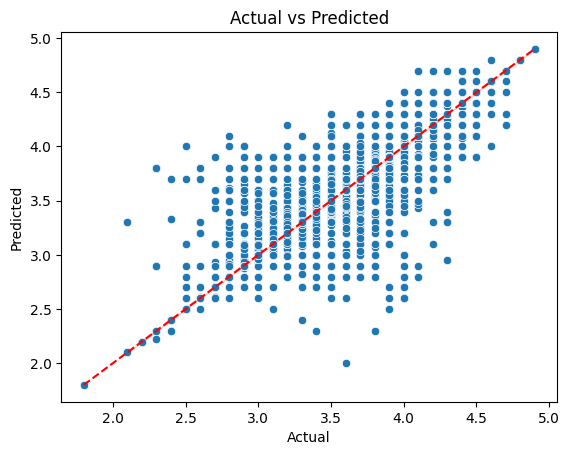

In [ ]:
sns.scatterplot(data=inspectionDTB, x=inspectionDTB.Actual, y=inspectionDTB.Predicted)

# Line where Actual and Predicted are the same
sns.lineplot(x=inspectionDTB['Actual'], y=inspectionDTB['Actual'], color='red', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#Pre Pruned Decision Tree

In [ ]:
# Create Pre pruned Decision Tree
pre_pruned_regressor = DecisionTreeRegressor(max_depth=25, max_features='sqrt', criterion='squared_error', splitter='best', max_leaf_nodes=15, random_state=1)
#Train pre pruned Decision
pre_pruned_regressor.fit(X_train_scaled, y_train)

# Write code to predict the response for test dataset
y_pred_pre_pruned = pre_pruned_regressor.predict(X_test_scaled)

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Book_table = X_test['book_table']
average_cost_for_two = X_test['ave_cost_for_two']
Votes = X_test['votes']
Average_review_ranking = X_test['ave_review_ranking']
#inspection DT pre
inspectionDTPre=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_pre_pruned})
inspectionDTPre=pd.DataFrame({'book_table':Book_table,'ave_cost_for_two':average_cost_for_two,'votes':Votes,'ave_review_ranking':Average_review_ranking,'Actual':y_test, 'Predicted':y_pred_pre_pruned})
inspectionDTPre.head(20)

book_table  ave_cost_for_two  votes  ave_review_ranking  Actual  \
30093           0            300.00     54                2.00    3.00   
25162           0            600.00      8                3.50    3.20   
13773           0            300.00     14                3.93    3.60   
33099           0            400.00    118                1.50    3.70   
22924           1           1500.00   4748                3.74    4.20   
38025           0            400.00      4                2.75    3.20   
29173           0            500.00    287                4.00    4.00   
35606           0            300.00     33                5.00    3.80   
14551           0            400.00      4                4.50    3.30   
4752            0            600.00     96                3.00    3.80   
21070           1            800.00    737                4.17    4.10   
20730           0            500.00     21                4.27    3.50   
17846           0            650.00    540                2.00    3.80   
12954           0            400.00     20                3.40    3.00   
11184           0            500.00     28                4.20    3.90   
10843           0            600.00     59                4.00    3.90   
1594            0            600.00    310                3.80    3.70   
8384            0            750.00   1118                4.04    4.10   
32217           0            300.00     24                3.00    3.60   
29976           1           1500.00   1017                3.19    4.30   

       Predicted  
30093       3.14  
25162       3.36  
13773       3.50  
33099       3.14  
22924       4.08  
38025       3.31  
29173       3.86  
35606       3.86  
14551       3.50  
4752        3.44  
21070       4.35  
20730       3.50  
17846       3.61  
12954       3.36  
11184       3.86  
10843       3.64  
1594        3.95  
8384        3.90  
32217       3.44  
29976       4.08

#Performance evaluvation for the pre pruned decision tree

In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.2f' % metrics.mean_absolute_error(y_test, y_pred_pre_pruned))
print('Mean Squared Error:', '%.2f' % metrics.mean_squared_error(y_test, y_pred_pre_pruned))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_pre_pruned))
print('Root Mean Squared Error:', '%.2f' % rmse)

Mean Absolute Error: 0.23
Mean Squared Error: 0.09
Root Mean Squared Error: 0.31


In [ ]:
print("R-squared: %.3f" % metrics.r2_score(y_test, y_pred_pre_pruned))

R-squared: 0.498


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
inspectionDTPre['Actual'].describe()

count   6359
mean       4
std        0
min        2
25%        3
50%        4
75%        4
max        5
Name: Actual, dtype: float64

In [ ]:
inspectionDTPre['Predicted'].describe()

count   6359
mean       4
std        0
min        3
25%        3
50%        4
75%        4
max        4
Name: Predicted, dtype: float64

Visualising the Pre Pruned DT

In [ ]:
# Convert feature_names to a list if it's an Index object
feature_names = list(features) if isinstance(features, pd.Index) else features

# Extract the decision rules
rules = export_text(pre_pruned_regressor, feature_names=feature_names)
print(rules)

|--- ave_review_ranking <= 0.54
|   |--- ave_review_ranking <= 0.37
|   |   |--- votes <= 0.04
|   |   |   |--- value: [3.14]
|   |   |--- votes >  0.04
|   |   |   |--- value: [3.61]
|   |--- ave_review_ranking >  0.37
|   |   |--- book_table <= 0.50
|   |   |   |--- ave_review_ranking <= 0.50
|   |   |   |   |--- value: [3.31]
|   |   |   |--- ave_review_ranking >  0.50
|   |   |   |   |--- value: [3.44]
|   |   |--- book_table >  0.50
|   |   |   |--- value: [3.79]
|--- ave_review_ranking >  0.54
|   |--- ave_cost_for_two <= 0.28
|   |   |--- votes <= 0.00
|   |   |   |--- ave_review_ranking <= 0.68
|   |   |   |   |--- value: [3.36]
|   |   |   |--- ave_review_ranking >  0.68
|   |   |   |   |--- value: [3.50]
|   |   |--- votes >  0.00
|   |   |   |--- ave_cost_for_two <= 0.22
|   |   |   |   |--- ave_review_ranking <= 0.64
|   |   |   |   |   |--- value: [3.66]
|   |   |   |   |--- ave_review_ranking >  0.64
|   |   |   |   |   |--- value: [3.86]
|   |   |   |--- ave_cost_for_two

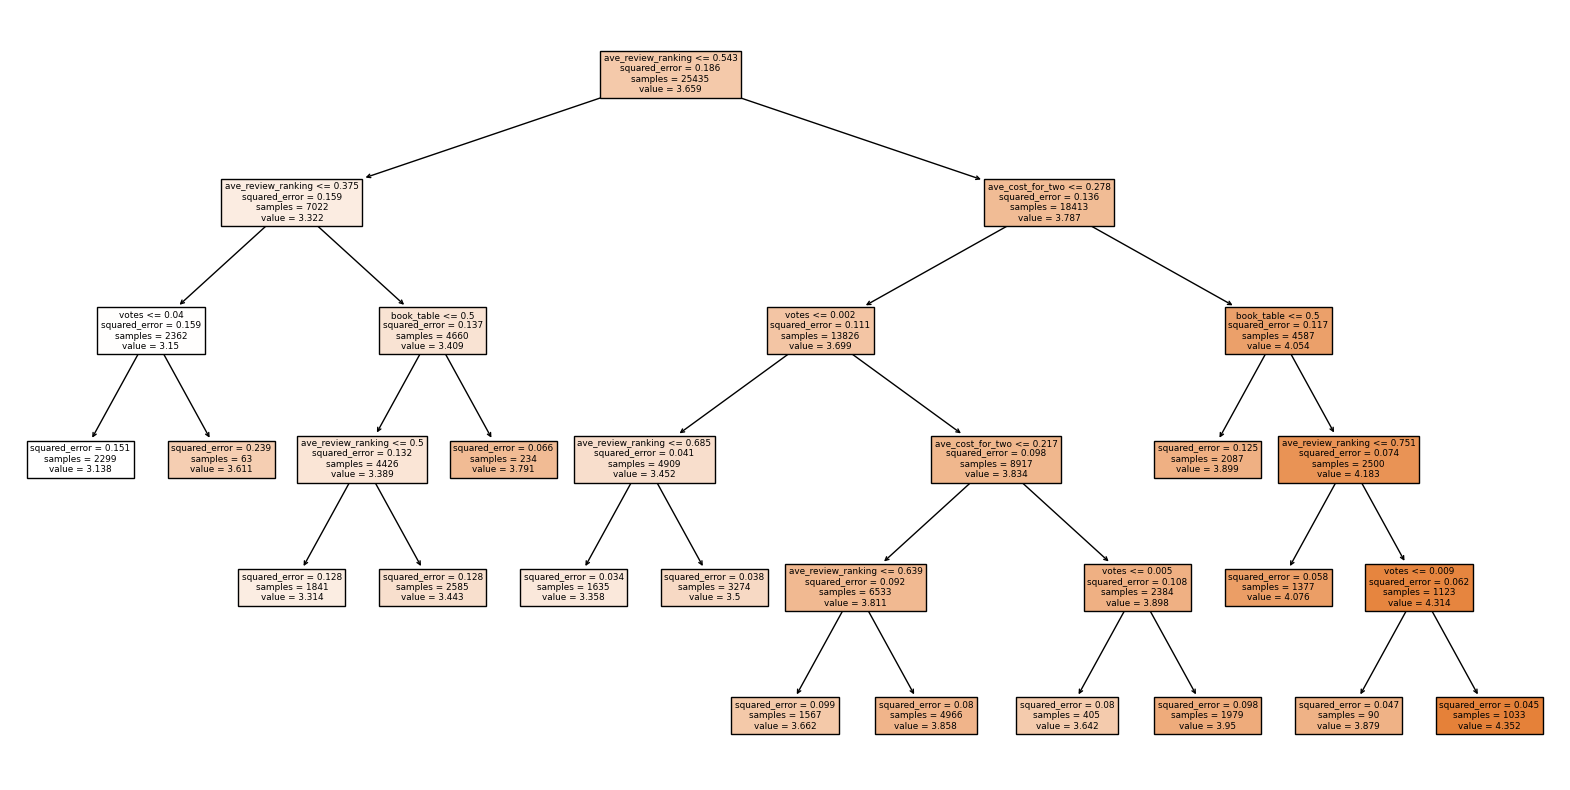

In [ ]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_regressor, filled=True, feature_names=features, class_names=['0','1'])
plt.show()

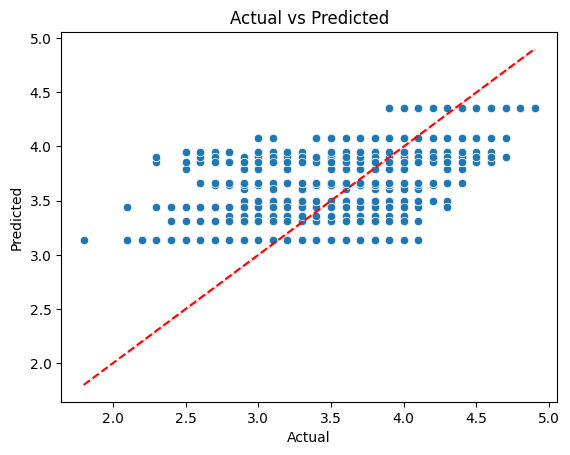

In [ ]:
sns.scatterplot(data=inspectionDTPre, x=inspectionDTPre.Actual, y=inspectionDTPre.Predicted)

# Line where Actual and Predicted are the same
sns.lineplot(x=inspectionDTPre['Actual'], y=inspectionDTPre['Actual'], color='red', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Post Pruned Decision Tree

In [ ]:
# Post-prune the decision tree
path = regressor.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha
# Adjust ccp_alpha if it's very close to zero
epsilon = 1e-10  # A small epsilon value
ccp_alphas = [alpha if alpha >= epsilon else epsilon for alpha in ccp_alphas]
decision_trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(max_depth=20, criterion='squared_error', max_leaf_nodes=20, random_state=1, ccp_alpha=ccp_alpha)
    dt.fit(X_train_scaled, y_train)
    decision_trees.append(dt)

In [ ]:
# Find the decision tree with the lowest Mean Squared Error on the validation data
mse_scores = [mean_squared_error(y_test, dt.predict(X_test_scaled)) for dt in decision_trees]
best_tree_idx = mse_scores.index(min(mse_scores))
best_pruned_regressor = decision_trees[best_tree_idx]

In [ ]:
#Predict the Ratings
y_pred_post_pruned = best_pruned_regressor.predict(X_test_scaled)

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Book_table = X_test['book_table']
average_cost_for_two = X_test['ave_cost_for_two']
Votes = X_test['votes']
Average_review_ranking = X_test['ave_review_ranking']
#inspection
inspectionDTPost=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_post_pruned})
inspectionDTPost=pd.DataFrame({ 'book_table':Book_table,'ave_cost_for_two':average_cost_for_two,'votes':Votes,'ave_review_ranking':Average_review_ranking,'Actual':y_test, 'Predicted':y_pred_post_pruned})
inspectionDTPost.head(20)

book_table  ave_cost_for_two  votes  ave_review_ranking  Actual  \
30093           0            300.00     54                2.00    3.00   
25162           0            600.00      8                3.50    3.20   
13773           0            300.00     14                3.93    3.60   
33099           0            400.00    118                1.50    3.70   
22924           1           1500.00   4748                3.74    4.20   
38025           0            400.00      4                2.75    3.20   
29173           0            500.00    287                4.00    4.00   
35606           0            300.00     33                5.00    3.80   
14551           0            400.00      4                4.50    3.30   
4752            0            600.00     96                3.00    3.80   
21070           1            800.00    737                4.17    4.10   
20730           0            500.00     21                4.27    3.50   
17846           0            650.00    540                2.00    3.80   
12954           0            400.00     20                3.40    3.00   
11184           0            500.00     28                4.20    3.90   
10843           0            600.00     59                4.00    3.90   
1594            0            600.00    310                3.80    3.70   
8384            0            750.00   1118                4.04    4.10   
32217           0            300.00     24                3.00    3.60   
29976           1           1500.00   1017                3.19    4.30   

       Predicted  
30093       3.13  
25162       3.34  
13773       3.48  
33099       3.13  
22924       4.14  
38025       3.24  
29173       3.85  
35606       3.69  
14551       3.34  
4752        3.45  
21070       4.16  
20730       3.69  
17846       3.31  
12954       3.57  
11184       3.69  
10843       3.79  
1594        3.85  
8384        4.16  
32217       3.45  
29976       3.79

#Performance evaluvation for the post pruned decision tree - Second Recommended model

In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.2f' % metrics.mean_absolute_error(y_test, y_pred_post_pruned))
print('Mean Squared Error:', '%.2f' % metrics.mean_squared_error(y_test, y_pred_post_pruned))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_post_pruned))
print('Root Mean Squared Error:', '%.2f' % rmse)

Mean Absolute Error: 0.20
Mean Squared Error: 0.08
Root Mean Squared Error: 0.28


In [ ]:
print("R-squared: %.3f" % metrics.r2_score(y_test, y_pred_post_pruned))

R-squared: 0.579


In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inspectionDTPost['Actual'].describe()

count   6359.00
mean       3.65
std        0.43
min        1.80
25%        3.40
50%        3.70
75%        4.00
max        4.90
Name: Actual, dtype: float64

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inspectionDTPost['Predicted'].describe()

count   6359.00
mean       3.65
std        0.33
min        3.13
25%        3.34
50%        3.69
75%        3.85
max        4.38
Name: Predicted, dtype: float64

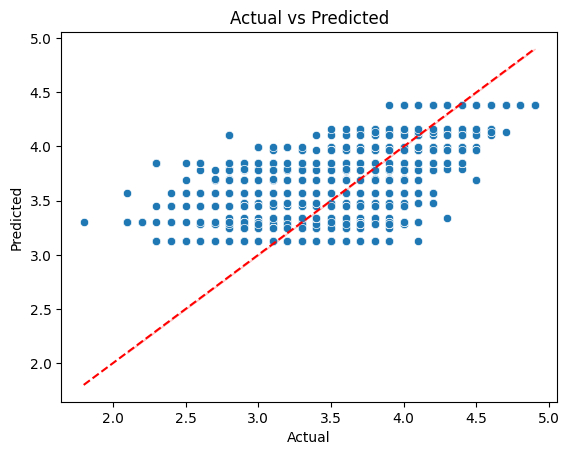

In [ ]:
sns.scatterplot(data=inspectionDTPost, x=inspectionDTPost.Actual, y=inspectionDTPost.Predicted)

# Line where Actual and Predicted are the same
sns.lineplot(x=inspectionDTPost['Actual'], y=inspectionDTPost['Actual'], color='red', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

#Model 3 : KNN Regressor KNN = 10
#Best Model
#Recommended Supervised learning model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Create a KNN regressor object
k=10
knn = KNeighborsRegressor(k)

# Write code to fit the model to the SCALED training data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
# Write code to predict the charges for the SCALED testing data
y_pred_knn = knn.predict(X_test_scaled)

# Performance Evaluation for KNN regressor - Best Performing and First Recommendation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
inspectionKnn=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_knn})
#join X_test with the new dataframe
inspectionKnn=pd.concat([X_test,inspectionKnn], axis=1)

inspectionKnn.head()

ave_cost_for_two  votes  ave_review_ranking  book_table  Actual  \
30093            300.00     54                2.00           0    3.00   
25162            600.00      8                3.50           0    3.20   
13773            300.00     14                3.93           0    3.60   
33099            400.00    118                1.50           0    3.70   
22924           1500.00   4748                3.74           1    4.20   

       Predicted  
30093       2.95  
25162       3.47  
13773       3.61  
33099       3.35  
22924       4.20

In [ ]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred_knn)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred_knn)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred_knn)

print(f"Root Mean Squared Error: {np.sqrt(mse):.3f}")
print('Mean Squared Error:', '%.2f' % metrics.mean_squared_error(y_test, y_pred_knn))
print(f"Mean Absolute Error : {mae:.3f}")
print(f"R2: {r2:.4f}")

Root Mean Squared Error: 0.243
Mean Squared Error: 0.06
Mean Absolute Error : 0.163
R2: 0.6834


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
inspectionKnn.Actual.describe()

count   6359.00
mean       3.65
std        0.43
min        1.80
25%        3.40
50%        3.70
75%        4.00
max        4.90
Name: Actual, dtype: float64

In [ ]:
#Similarly, write code to see descriptive stats for inspection.Predicted
pd.set_option('display.float_format', '{:.2f}'.format)
inspectionKnn.Predicted.describe()

count   6359.00
mean       3.65
std        0.36
min        2.31
25%        3.38
50%        3.64
75%        3.90
max        4.90
Name: Predicted, dtype: float64

In [ ]:
sns.scatterplot(data=inspectionKnn, x=inspectionKnn.Actual, y=inspectionKnn.Predicted)

# Line where Actual and Predicted are the same
sns.lineplot(x=inspectionKnn['Actual'], y=inspectionKnn['Actual'], color='red', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Data preparation for a K - Means Clustering Model

In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [ ]:
# Selecting relevant features for clustering
clustering_features=['ave_cost_for_two','votes','ave_review_ranking','book_table']
X_clust = Foodiebay[clustering_features]

In [ ]:
X_clust.describe()

ave_cost_for_two    votes  ave_review_ranking  book_table
count          31794.00 31794.00            31794.00    31794.00
mean             546.24   284.31                3.59        0.13
std              339.07   659.50                0.84        0.33
min               40.00     0.00                1.00        0.00
25%              300.00    20.00                3.00        0.00
50%              500.00    68.00                3.73        0.00
75%              700.00   244.00                4.08        0.00
max             2500.00 12121.00                5.00        1.00

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler(clip=True)

In [ ]:
# Features to scale
features_to_scale_clustering = ['ave_cost_for_two','votes','ave_review_ranking']

# Features to keep
features_to_keep_clust = ['book_table']

# Fit and transform the features to scale on the training data
X_scaled_values_clust = scaler.fit_transform(X_clust[features_to_scale_clustering])

# Create DataFrames from the scaled values
X_features_scaled_cluster = pd.DataFrame(X_scaled_values_clust, columns=features_to_scale_clustering)

# Concatenate the unscaled features back into the scaled DataFrames
X_features_scaled_cluster = pd.concat([X_features_scaled_cluster, X_clust[features_to_keep_clust].reset_index(drop=True)], axis=1)



#Model building K - Means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
X_features_scaled_cluster.sample(10)

ave_cost_for_two  votes  ave_review_ranking  book_table
18730              0.27   0.09                0.57           0
7748               0.04   0.00                0.58           0
19027              0.25   0.00                0.92           0
27515              0.15   0.01                0.60           0
24736              0.59   0.02                0.73           1
28822              0.27   0.00                0.84           0
26768              0.19   0.00                0.50           0
11705              0.25   0.01                0.33           0
23525              0.19   0.00                0.68           0
24185              0.43   0.01                0.54           1

In [ ]:
# Fit K-means clustering model with a 'guessed' number of clusters
k=5
kmeans = KMeans(n_clusters=k, n_init='auto',max_iter=300, random_state=1)

#fit kmeans with X_scaled_cl
kmeans.fit(X_features_scaled_cluster)

# Add cluster labels to original dataset
Foodiebay['Cluster'] = kmeans.labels_

#Clustering Evaluvation

Within Cluster Sum of Squares

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 676.019


Davies Boulden Index

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_features_scaled_cluster, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.851


Silhouette score

In [ ]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_features_scaled_cluster, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.410


In [ ]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [ ]:
#fit kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_features_scaled_cluster)

#Optimising K

In [ ]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_features_scaled_cluster)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  40
Best within cluster sum of squarred error score:  114.610


In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.figure(figsize=(12, 6))
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.xticks(range(2, 41))
plt.show()

Optimize clusters based on the Davies Boulden Score

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Determine optimal number of clusters using the SSE metric
dbs_scores = []
best_k=3
best_dbs_score=1
for k in range(2, 41):
  kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2023)
  kmeans.fit(X_features_scaled_cluster)
  dbs_score_k=davies_bouldin_score(X_features_scaled_cluster, kmeans.labels_)
  dbs_scores.append(dbs_score_k)
  if best_dbs_score > dbs_score_k:
    best_k = k
    best_dbs_score = dbs_score_k

print('Best k: ', best_k)
print('Best Davies Bouldin index: ', '%.3f' %best_dbs_score)

Best k:  2
Best Davies Bouldin index:  0.387


In [ ]:
import matplotlib.pyplot as plt

# Assuming you have defined dbs_scores and want to plot them

# Set a custom figure size to increase the width of the plot
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Plot the Davies-Bouldin indices to determine the optimal number of clusters
plt.plot(range(2, 41), dbs_scores, color='darkorange', label='Davies Bouldin index')

# Customize the x-axis ticks to show more data points
plt.xticks(range(2, 41))  # This will show all numbers from 2 to 40 on the x-axis

plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.show()

Optimise the clusters based on silhoutte score

In [ ]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_features_scaled_cluster)
  sil_score_i=silhouette_score(X_features_scaled_cluster, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  2
Best silhouette score:  0.736


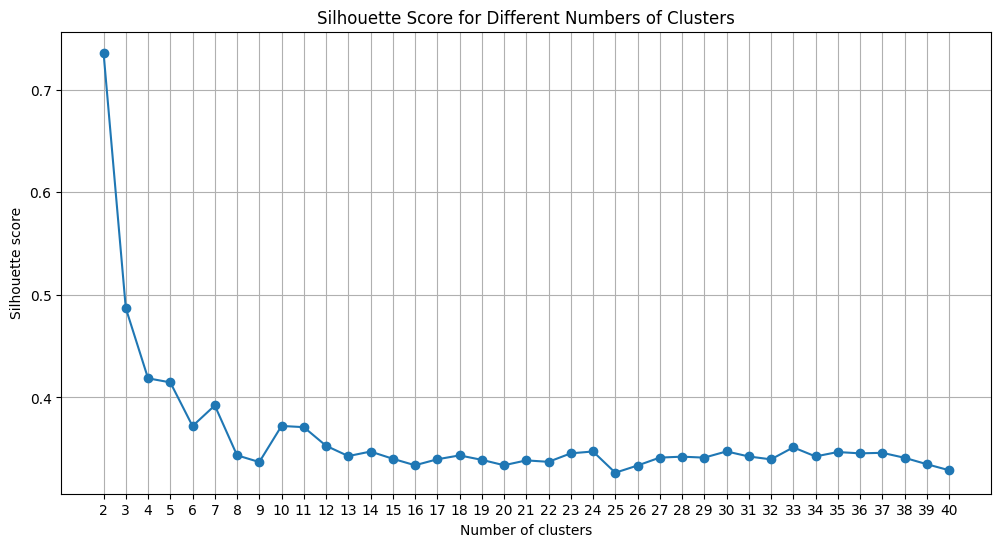

In [ ]:
# Set a custom figure size to increase the width of the plot
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Plot the silhouette scores to determine the optimal number of clusters
plt.plot(range(2, 41), sil_scores, marker='o')  # Adding markers for data points
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 41))
plt.grid(True)
plt.show()

Observe Both

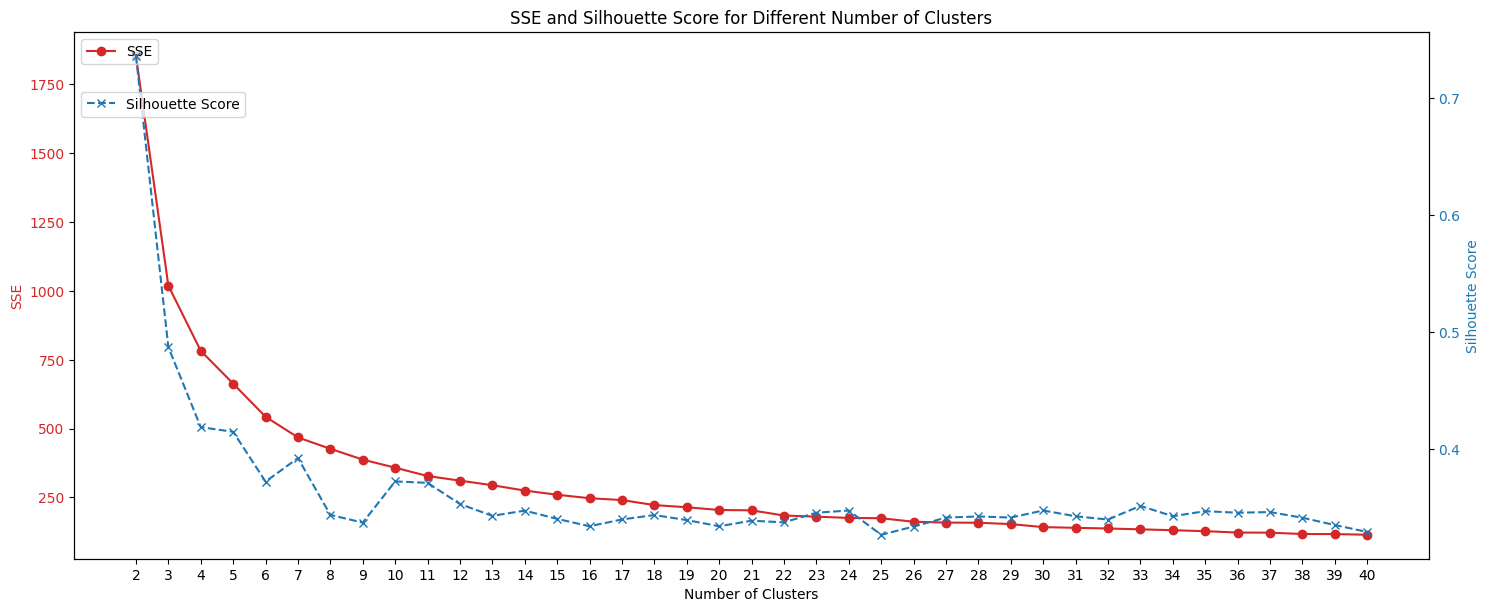

In [ ]:
# Set a custom figure size to increase the width of the plot and adjust subplot spacing
fig, ax1 = plt.subplots(figsize=(15, 6))

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.xticks(range(2, 41))
plt.show()


Based on Davies Boulden, SSE, and Silhoutte scores the best number of clusters is 6. At less than 0.45 Silhoutte score the clustering is poor. But with the available data this is th best clustering solution possible.

#Model Selection

In [ ]:
# Best K = 6
best_k= 6
n_clusters=X_features_scaled_cluster

In [ ]:
# initialise the model object
kmeans = KMeans(n_clusters=best_k,n_init='auto', random_state=1)

#Fit K-means clustering model with the selected number of clusters
kmeans.fit(X_features_scaled_cluster)

KMeans(n_clusters=6, n_init='auto', random_state=1)

In [ ]:
# Add cluster labels to original dataset
Foodiebay['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_features_scaled_cluster, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_features_scaled_cluster, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 542.237
Davies Bouldin index: 0.768
Silhouette score: 0.440


Silhouette plot

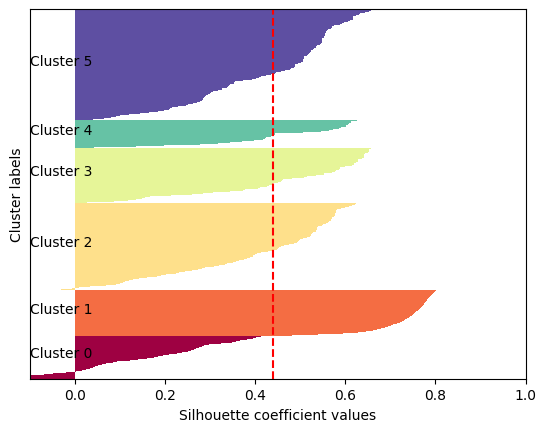

In [ ]:


# Assuming X_features_scaled_cluster is a NumPy array or matrix
# Compute sample silhouette scores
cluster_labels = kmeans.labels_  # Assuming you have already computed kmeans.labels_
sample_silhouette_values = silhouette_samples(X_features_scaled_cluster, cluster_labels)

# Corrected loop structure and indexing
n_clusters = 6  # Specify the correct number of clusters
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Corrected loop structure to iterate over the correct number of clusters
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

# Rest of the code for plotting the silhouette diagram (unchanged from Code 1)
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_features_scaled_cluster) + (n_clusters + 1) * 10])

plt.show()

Post analysis for cluster profiling

In [ ]:
Foodiebay[['ave_cost_for_two','votes','ave_review_ranking','book_table','Cluster']].head(10)

ave_cost_for_two  votes  ave_review_ranking  book_table  Cluster
0            700.00     13                4.75           0        3
1            400.00     28                4.50           0        3
2            200.00     18                4.00           0        5
3           1200.00    550                4.80           1        1
4            250.00     67                3.00           0        2
5            650.00    140                3.50           0        0
6            300.00      4                3.73           0        5
7            250.00    204                3.50           0        5
8            300.00    127                1.85           0        4
9            300.00     37                3.35           0        2

In [ ]:
cluster_count=Foodiebay.Cluster.value_counts()
cluster_count

5    9495
2    7462
3    4764
1    4000
0    3666
4    2407
Name: Cluster, dtype: int64

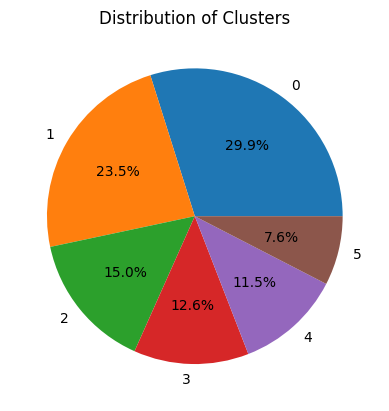

In [ ]:
# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors= colours)
plt.title('Distribution of Clusters')
plt.show()

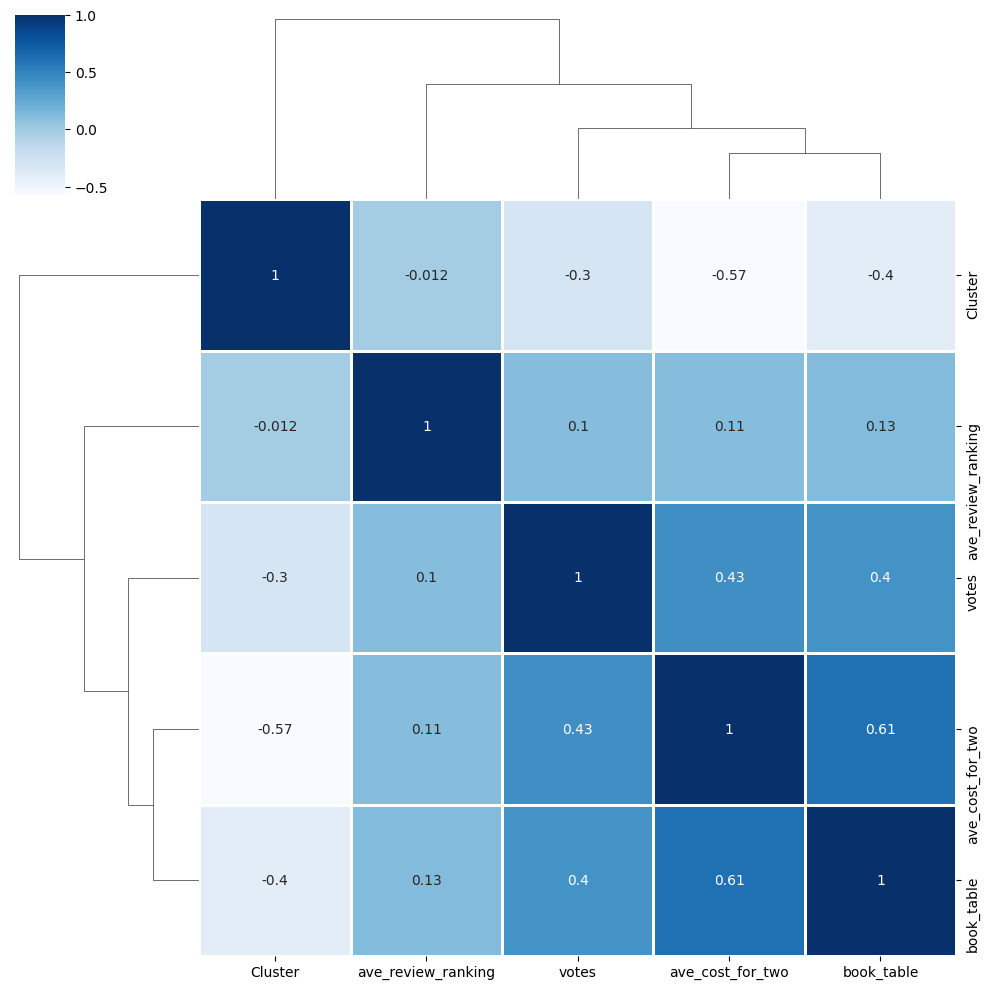

In [ ]:
#visualise clustermap
sns.clustermap(data=Foodiebay[['ave_cost_for_two','votes','ave_review_ranking','book_table','Cluster']].corr(), cmap="Blues", linewidths=.9, annot=True)

ave_cost_for_two :

          count    mean    std    min    25%     50%     75%     max
Cluster                                                             
0       3666.00  878.34 277.10 600.00 700.00  800.00  987.50 2200.00
1       4000.00 1093.69 393.50 300.00 800.00 1000.00 1400.00 2500.00
2       7462.00  436.27 178.95  40.00 300.00  400.00  550.00 1200.00
3       4764.00  401.22 171.36  80.00 300.00  400.00  500.00 1000.00
4       2407.00  440.17 192.87 100.00 300.00  400.00  500.00 2000.00
5       9495.00  373.48 138.58  40.00 250.00  400.00  500.00  600.00




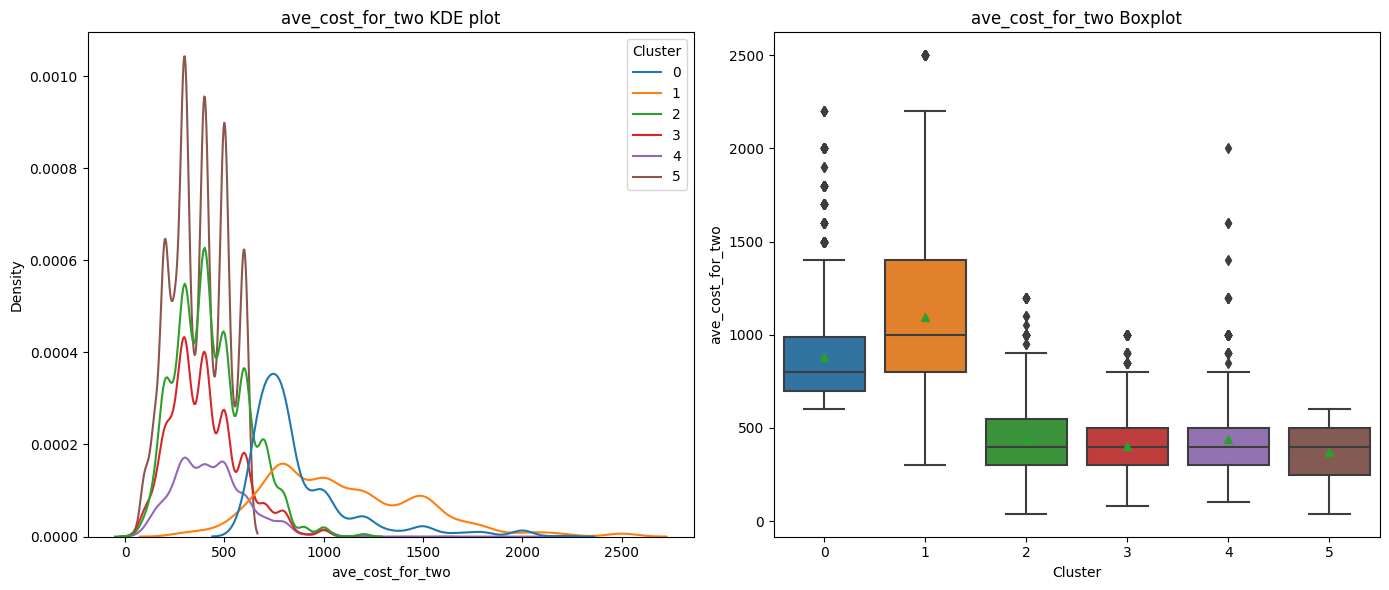

votes :

          count   mean     std  min    25%    50%     75%      max
Cluster                                                           
0       3666.00 599.28 1027.60 0.00  72.00 218.50  670.00  8304.00
1       4000.00 978.32 1205.39 0.00 223.00 574.00 1331.50 12121.00
2       7462.00 129.10  211.52 0.00  19.00  53.00  145.00  3232.00
3       4764.00  80.12  209.96 0.00  10.00  23.00   73.00  4421.00
4       2407.00  76.20  114.58 0.00  12.00  33.00   90.00   912.00
5       9495.00 147.52  255.89 0.00  17.00  52.00  172.00  4460.00




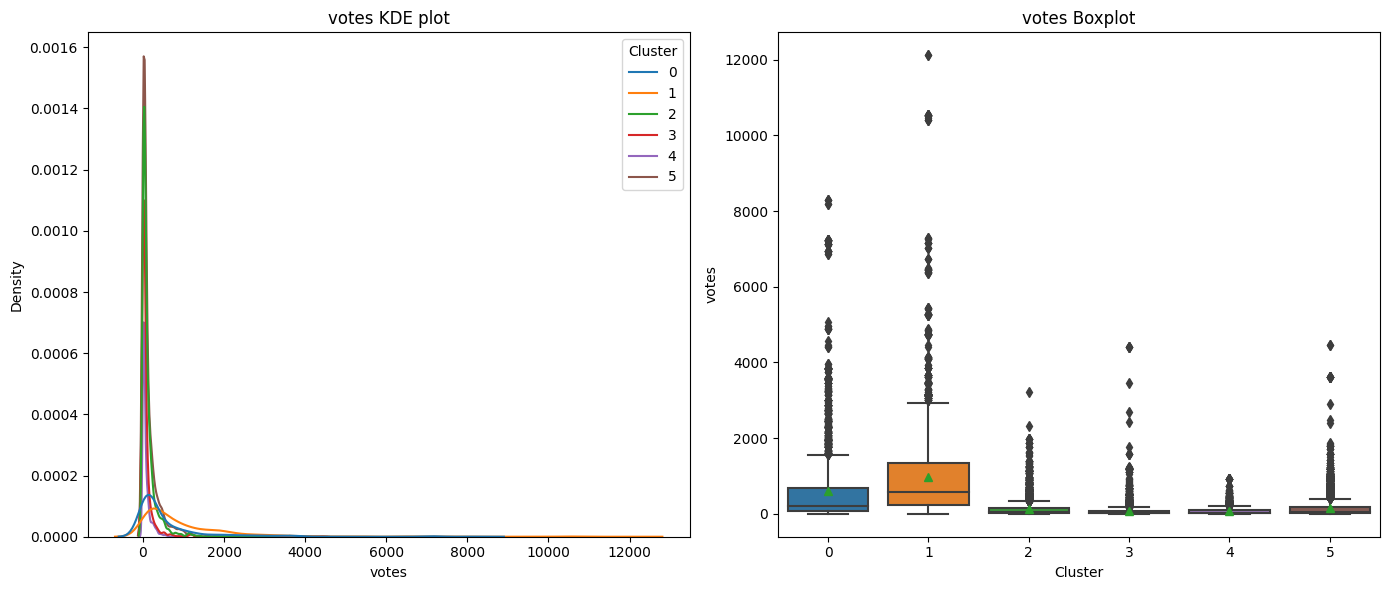

ave_review_ranking :

          count  mean  std  min  25%  50%  75%  max
Cluster                                            
0       3666.00  3.85 0.36 2.50 3.62 3.86 4.05 5.00
1       4000.00  3.87 0.51 1.00 3.62 3.96 4.20 5.00
2       7462.00  2.94 0.27 2.30 2.75 3.00 3.12 3.41
3       4764.00  4.72 0.25 4.25 4.50 4.71 5.00 5.00
4       2407.00  1.65 0.47 1.00 1.00 2.00 2.00 2.29
5       9495.00  3.82 0.23 3.33 3.67 3.82 4.00 4.31




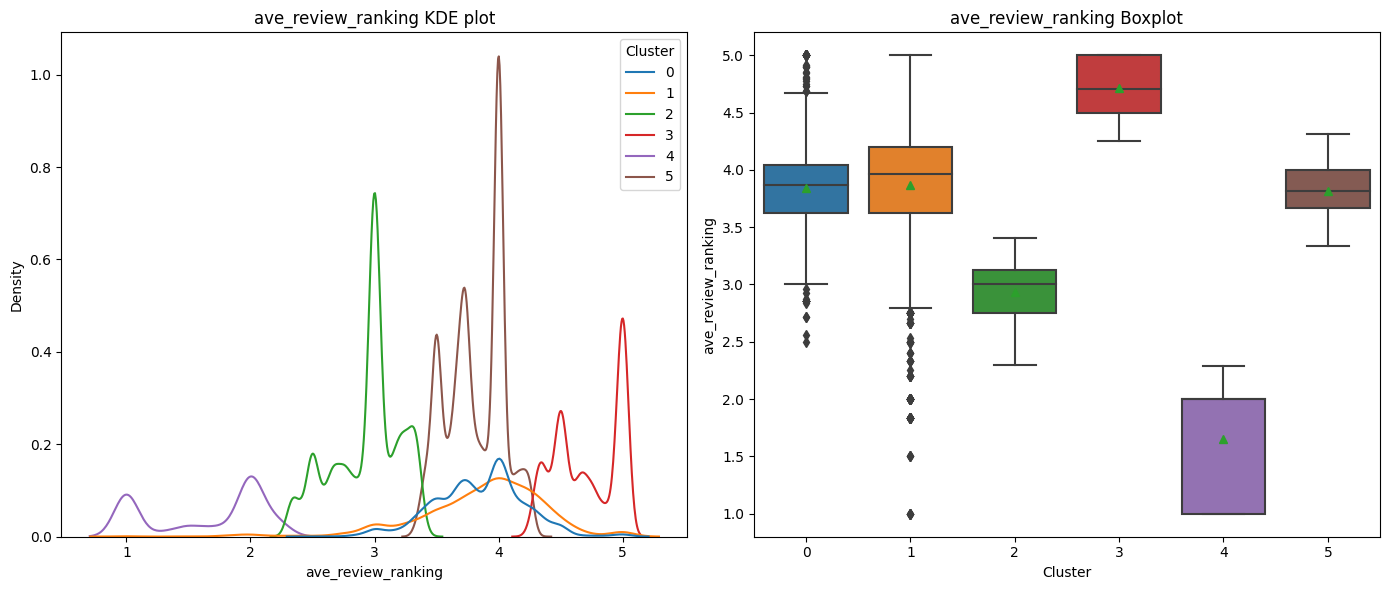

In [ ]:
nums=['ave_cost_for_two','votes','ave_review_ranking']
for i in nums:
  print(i, ':\n')
  print(Foodiebay.groupby('Cluster')[i].describe())
  print('\n')

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Plot KDE on the first subplot
  sns.kdeplot(data=Foodiebay, x=i, hue='Cluster', ax=axes[0], palette='tab10')
  axes[0].set_title(f'{i} KDE plot')

  # Plot Boxplot on the second subplot
  sns.boxplot(x='Cluster', y=i, data=Foodiebay, showmeans=True, ax=axes[1], palette='tab10')
  axes[1].set_title(f'{i} Boxplot')

  plt.tight_layout()  # Adjust layout so plots do not overlap
  plt.show()

Cluster  book_table
0        0             3666
1        1             4000
2        0             7462
3        0             4764
4        0             2407
5        0             9495
dtype: int64




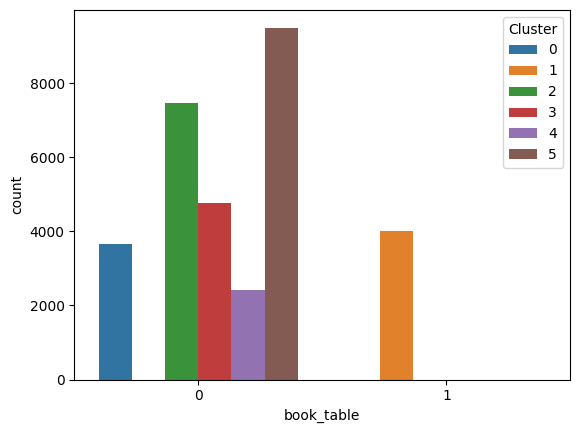

In [ ]:
print(Foodiebay.groupby('Cluster')['book_table',].value_counts())
print('\n')
sns.countplot(hue=Foodiebay['Cluster'], x=Foodiebay['book_table'], palette='tab10')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = Foodiebay['Cluster'].unique()

# Color map
colors = plt.cm.jet(np.linspace(0, 1, len(unique_clusters)))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=20, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = Foodiebay[Foodiebay['Cluster'] == cluster]
    ax.scatter(cluster_data['ave_cost_for_two'], cluster_data['votes'], cluster_data['ave_review_ranking'],
               label=f'Cluster {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('ave_cost_for_two')
ax.set_ylabel('votes')
ax.set_zlabel('ave_review_ranking')
ax.legend()

# Show the plot
plt.show()

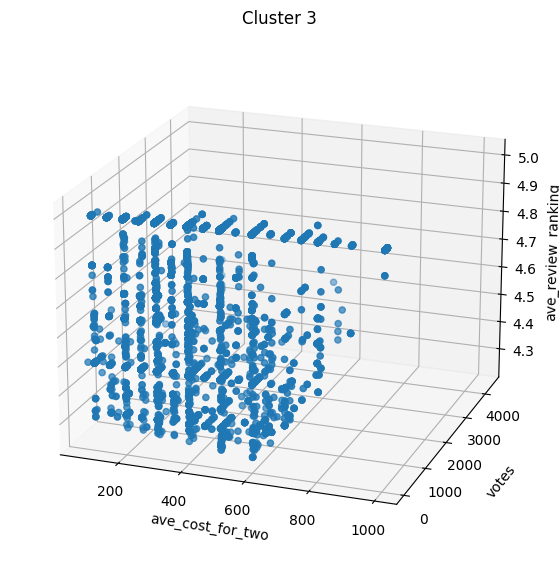

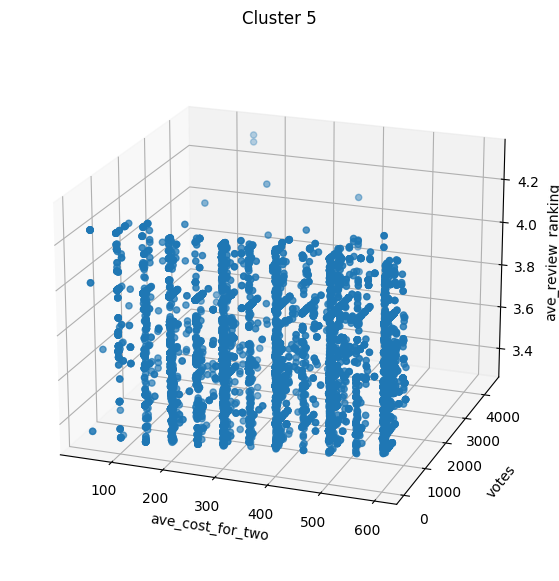

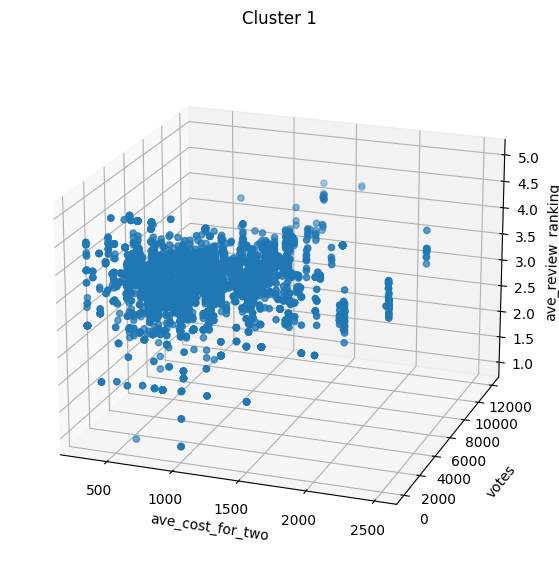

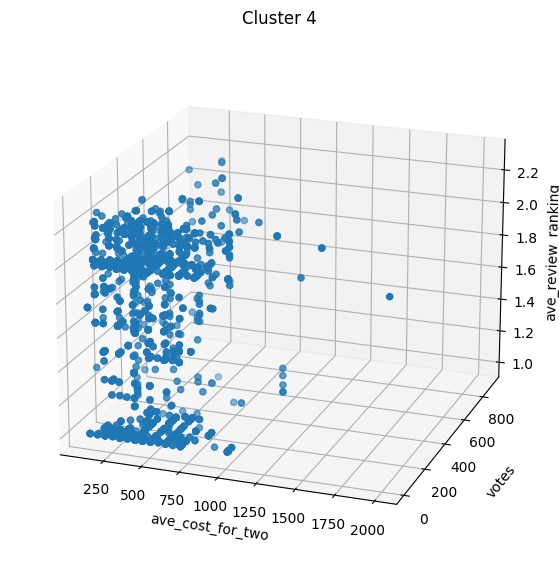

In [ ]:
unique_clusters = Foodiebay['Cluster'].unique()

# Iterate over each unique cluster to create a 3D plot
for cluster in unique_clusters:
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Filter data to include only the current cluster
    cluster_data = Foodiebay[Foodiebay['Cluster'] == cluster]

    # Create 3D scatter plot
    ax.scatter(cluster_data['ave_cost_for_two'], cluster_data['votes'], cluster_data['ave_review_ranking'])

    # Adjusting the viewing angle for better visibility
    ax.view_init(elev=20, azim=-70)  # Modify these values as needed

    # Adding title and labels
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('ave_cost_for_two')
    ax.set_ylabel('votes', labelpad=10)
    ax.set_zlabel('ave_review_ranking')

    plt.show()